In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [35]:
# calling biomarkers
bloodbiomk1_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\bloodbiomk1_20231117.csv"
bloodbiomk1 = pd.read_csv(bloodbiomk1_file_path)
bloodbiomk1 = pd.DataFrame(bloodbiomk1)

bloodbiomk2_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\bloodbiomk2_20231117.csv"
bloodbiomk2 = pd.read_csv(bloodbiomk2_file_path)
bloodbiomk2 = pd.DataFrame(bloodbiomk2)

csfbiomk1_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\csfbiomk1_20231117.csv"
csfbiomk1 = pd.read_csv(csfbiomk1_file_path)
csfbiomk1 = pd.DataFrame(csfbiomk1)

csfbiomk2_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\csfbiomk2_20231117.csv"
csfbiomk2 = pd.read_csv(csfbiomk2_file_path)
csfbiomk2 = pd.DataFrame(csfbiomk2)

csfbiomk3_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\csfbiomk3_20231117.csv"
csfbiomk3 = pd.read_csv(csfbiomk3_file_path)
csfbiomk3 = pd.DataFrame(csfbiomk3)


In [36]:
import os
main_path = r'Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers'
folder_name = 'blood_biomk1_to_briefa'  
save_path = os.path.join(main_path, folder_name)
os.makedirs(save_path, exist_ok=True)

# save_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\blood_biomk1_briefa" # Update this path to your desired folder


In [37]:
# Check for null values in each column
bloodbiomk1_nulls = bloodbiomk1.isnull().sum()

bloodbiomk1_nulls_df = pd.DataFrame({
    'Column': bloodbiomk1_nulls.index,
    'Number of Nulls': bloodbiomk1_nulls.values
})

bloodbiomk1_nulls_df_transposed = bloodbiomk1_nulls_df.T

print("Null values in bloodbiomk1:")
print(bloodbiomk1_nulls_df)
bloodbiomk1_nulls_df_transposed.to_csv(r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\bloodbiomk1_nulls.csv", index=False)


Null values in bloodbiomk1:
                           Column  Number of Nulls
0                      subject_id                0
1                           visit                0
2                     checkin_bin                0
3                     exposurebin                0
4                      age_decade                0
5                racecat_combined                0
6                        eduyears                0
7                      totyr_foot               56
8                     chiiseas_pf               56
9                      chiiyrs_pf               56
10                    chiiseas_pl               56
11                     chiiyrs_pl               56
12                    chiiseas_pg               56
13                     chiiyrs_pg               56
14                         p_Ab40                4
15                         p_Ab42                5
16                         p_GFAP                8
17                          p_NfL                4
18 

In [38]:
bloodbiomk1 = bloodbiomk1.drop(columns=bloodbiomk1.loc[:,'subject_id':'chiiyrs_pg'].columns)
bloodbiomk1 = bloodbiomk1.drop(columns='p_PDGFRbeta_FLAG_other')

bloodbiomk1.head()

p_Ab40  p_Ab42  p_GFAP  p_NfL  p_Ab40_FLAG_below_ref_range  \
0   126.5   8.535   73.80  11.95                          0.0   
1    84.2   7.460   42.05   6.44                          0.0   
2   124.0   7.285   34.35   8.22                          0.0   
3   110.5   5.920   48.45  13.00                          0.0   
4   126.0   9.150   46.75  11.20                          0.0   

   p_Ab42_FLAG_below_ref_range  p_GFAP_FLAG_below_ref_range  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   p_NfL_FLAG_below_ref_range  p_PDGFRbeta  p_pT181  p_pT231  p_ttau  \
0                         0.0      5628.71     8.12     7.58    1.25   
1                         0.0     10123.09     6.04     7.53    1.20   
2                         0.0     10045.39     9.33     9.34    1.57   
3                         0.0      9563.19     6.63     5.87    0.73   
4                         0.0     12826.15     8.31     7.99    1.54   

   dxcte_totaltau_plasma_flag_dv  
0                            1.0  
1                            1.0  
2                            1.0  
3                            1.0  
4                            1.0

In [39]:
bloodbiomk1 = bloodbiomk1.drop(columns=['p_Ab40_FLAG_below_ref_range',
                              'p_Ab42_FLAG_below_ref_range',
                              'p_GFAP_FLAG_below_ref_range', 
                              'p_NfL_FLAG_below_ref_range',
                              'dxcte_totaltau_plasma_flag_dv'])
bloodbiomk1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   p_Ab40       232 non-null    float64
 1   p_Ab42       231 non-null    float64
 2   p_GFAP       228 non-null    float64
 3   p_NfL        232 non-null    float64
 4   p_PDGFRbeta  231 non-null    float64
 5   p_pT181      232 non-null    float64
 6   p_pT231      232 non-null    float64
 7   p_ttau       226 non-null    float64
dtypes: float64(8)
memory usage: 14.9 KB


In [40]:
bloodbiomk1.head(10)

p_Ab40  p_Ab42  p_GFAP   p_NfL  p_PDGFRbeta  p_pT181  p_pT231  p_ttau
0  126.50   8.535   73.80  11.950      5628.71     8.12     7.58    1.25
1   84.20   7.460   42.05   6.440     10123.09     6.04     7.53    1.20
2  124.00   7.285   34.35   8.220     10045.39     9.33     9.34    1.57
3  110.50   5.920   48.45  13.000      9563.19     6.63     5.87    0.73
4  126.00   9.150   46.75  11.200     12826.15     8.31     7.99    1.54
5   42.60   3.565   20.80  50.300      4625.97     6.36     5.98    1.74
6   69.50   5.985   66.50   4.765      9019.82     5.30     5.69    1.33
7   76.85   5.465   98.10   9.330      4259.99     5.87     3.78    1.10
8  131.50   9.860   73.70  15.800      7806.22     6.47     3.74    2.14
9   85.00   7.900   21.70   7.975      6606.37     8.53     6.15    1.38

In [41]:
# Calculate the mean for each column, ignoring NaNs
mean_values = bloodbiomk1.mean()

bloodbiomk1 = bloodbiomk1.fillna(mean_values)

bloodbiomk1.head()

p_Ab40  p_Ab42  p_GFAP  p_NfL  p_PDGFRbeta  p_pT181  p_pT231  p_ttau
0   126.5   8.535   73.80  11.95      5628.71     8.12     7.58    1.25
1    84.2   7.460   42.05   6.44     10123.09     6.04     7.53    1.20
2   124.0   7.285   34.35   8.22     10045.39     9.33     9.34    1.57
3   110.5   5.920   48.45  13.00      9563.19     6.63     5.87    0.73
4   126.0   9.150   46.75  11.20     12826.15     8.31     7.99    1.54

In [42]:
# calling Neuropsychiatric Measurements

briefa_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\briefa_20231117.csv"
briefa = pd.read_csv(briefa_file_path)
briefa = pd.DataFrame(briefa)


In [43]:
# Check for null values in each column
briefa_nulls = briefa.isnull().sum()

briefa_nulls_df = pd.DataFrame({
    'Column': briefa_nulls.index,
    'Number of Nulls': briefa_nulls.values
})

briefa_nulls_df_transposed = briefa_nulls_df.T

print("Null values in briefa:")
print(briefa_nulls_df)
briefa_nulls_df_transposed.to_csv(r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\briefa_nulls.csv", index=False)


Null values in briefa:
          Column  Number of Nulls
0     subject_id                0
1          visit                0
2    checkin_bin                0
3    exposurebin                0
4     age_decade                0
..           ...              ...
102      workorg                0
103    upseteasy                0
104    impulsive                0
105       pickup                0
106     complete                0

[107 rows x 2 columns]


In [44]:
briefa.head()

subject_id  visit  checkin_bin  exposurebin  age_decade  racecat_combined  \
0        1001      1            2            1           1                 5   
1        1002      1            2            1           1                 5   
2        1003      1            2            1           1                 5   
3        1004      1            1            1           2                 5   
4        1005      1            3            0           2                 5   

   eduyears  totyr_foot  chiiseas_pf  chiiyrs_pf  ...  activityorg  getover  \
0      16.0         7.0       4335.4      2167.7  ...            2        1   
1      15.0        14.0      10363.1      5708.1  ...            3        3   
2      18.0        12.0       6685.4      4863.9  ...            3        3   
3      16.0        16.0       7701.2      6448.9  ...            1        1   
4      21.0         NaN          NaN         NaN  ...            1        2   

   onething  moodchange  consequence  workorg  upseteasy  impulsive  pickup  \
0         2           1            1        2          2          1       1   
1         3           2            3        3          3          3       2   
2         3           3            2        3          3          3       1   
3         1           1            1        1          2          1       1   
4         1           1            1        1          1          1       1   

   complete  
0         2  
1         3  
2         2  
3         1  
4         1  

[5 rows x 107 columns]

In [45]:
briefa = briefa.drop(columns=briefa.loc[:,'subject_id':'chiiyrs_pg'].columns)
briefa = briefa.drop(columns=briefa.loc[:,'negativ':'complete'].columns)
briefa.head()

mi  tmi  gec  tgec  bri  tbri  inhibit  shift  emotcont  selfmon  \
0   75   64  114    57   39    46       12      9        11        7   
1  101   85  171    85   70    79       17     15        23       15   
2   90   77  158    79   68    77       15     14        27       12   
3   43   40   81    42   38    46        9      8        15        6   
4   43   39   81    41   38    45        9     11        12        6   

   initiate  workmem  planorg  taskmon  orgmat  
0        14       17       20       13      11  
1        19       24       27       15      16  
2        20       22       22       14      12  
3         9        8       11        7       8  
4        10        8       10        7       8

In [46]:
briefa.describe()

mi         tmi         gec        tgec         bri        tbri  \
count  236.000000  236.000000  236.000000  236.000000  236.000000  236.000000   
mean    63.682203   56.724576  110.169492   56.508475   46.487288   55.203390   
std     19.879120   16.771696   33.473344   17.217382   14.657067   16.438698   
min     40.000000   36.000000   70.000000   35.000000   30.000000   36.000000   
25%     45.000000   41.000000   79.750000   41.000000   34.000000   41.000000   
50%     60.000000   53.000000  104.500000   54.000000   43.000000   51.000000   
75%     79.250000   68.250000  136.000000   69.000000   57.000000   67.250000   
max    116.000000  104.000000  204.000000  108.000000   88.000000  105.000000   

          inhibit       shift    emotcont     selfmon    initiate     workmem  \
count  236.000000  236.000000  236.000000  236.000000  236.000000  236.000000   
mean    12.169492    9.690678   15.758475    8.868644   12.605932   13.758475   
std      3.606861    3.378543    5.769042    3.063115    4.101039    4.922909   
min      8.000000    6.000000   10.000000    6.000000    8.000000    8.000000   
25%      9.000000    6.000000   10.000000    6.000000    9.000000    9.000000   
50%     11.000000    9.000000   14.000000    8.000000   12.000000   13.000000   
75%     14.000000   12.000000   20.000000   11.000000   16.000000   18.000000   
max     23.000000   18.000000   30.000000   18.000000   23.000000   24.000000   

          planorg     taskmon      orgmat  
count  236.000000  236.000000  236.000000  
mean    15.338983    9.466102   12.512712  
std      5.199379    2.946855    4.335387  
min     10.000000    6.000000    8.000000  
25%     10.000000    6.000000    9.000000  
50%     14.000000    9.000000   11.000000  
75%     19.250000   12.000000   15.000000  
max     29.000000   18.000000   24.000000

In [47]:
bloodbiomk1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   p_Ab40       236 non-null    float64
 1   p_Ab42       236 non-null    float64
 2   p_GFAP       236 non-null    float64
 3   p_NfL        236 non-null    float64
 4   p_PDGFRbeta  236 non-null    float64
 5   p_pT181      236 non-null    float64
 6   p_pT231      236 non-null    float64
 7   p_ttau       236 non-null    float64
dtypes: float64(8)
memory usage: 14.9 KB


In [48]:
import os
main_path = r'Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers'
folder_name = 'blood_biomk1_to_briefa'  
save_path = os.path.join(main_path, folder_name)
os.makedirs(save_path, exist_ok=True)


In [49]:
categories_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\categories.csv"
categories_df = pd.read_csv(categories_file_path)
new_column = categories_df['checkin_bin']
briefa['category'] = new_column
print(briefa.head())

bloodbiomk2['category'] = new_column
print(bloodbiomk2.head())


    mi  tmi  gec  tgec  bri  tbri  inhibit  shift  emotcont  selfmon  \
0   75   64  114    57   39    46       12      9        11        7   
1  101   85  171    85   70    79       17     15        23       15   
2   90   77  158    79   68    77       15     14        27       12   
3   43   40   81    42   38    46        9      8        15        6   
4   43   39   81    41   38    45        9     11        12        6   

   initiate  workmem  planorg  taskmon  orgmat  category  
0        14       17       20       13      11         2  
1        19       24       27       15      16         2  
2        20       22       22       14      12         2  
3         9        8       11        7       8         1  
4        10        8       10        7       8         3  
   subject_id  visit  checkin_bin  exposurebin  age_decade  racecat_combined  \
0        1001      1            2            1           1                 5   
1        1002      1            2            1       

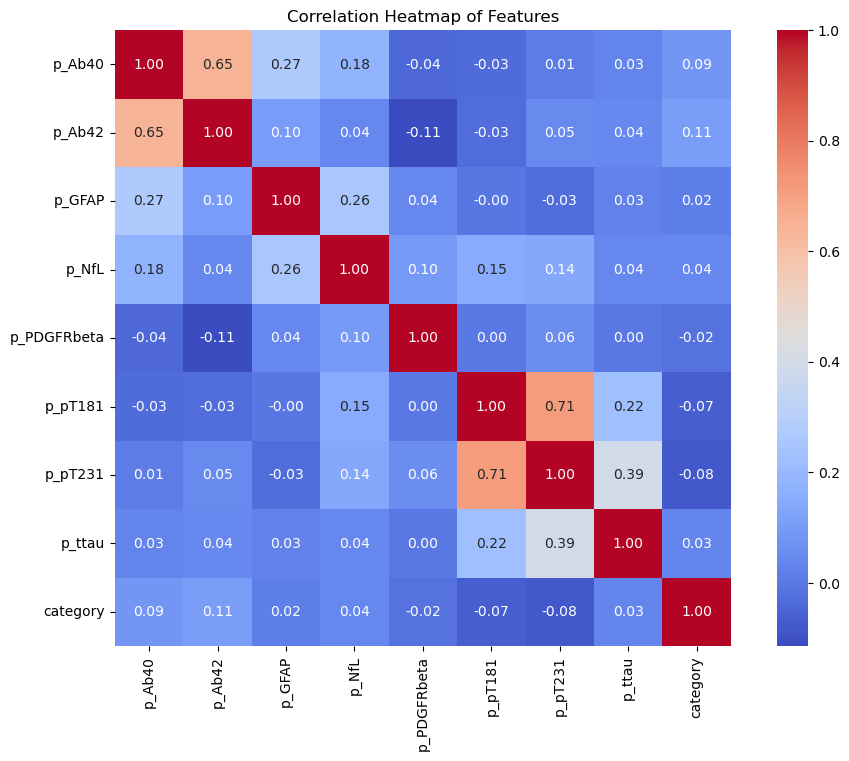

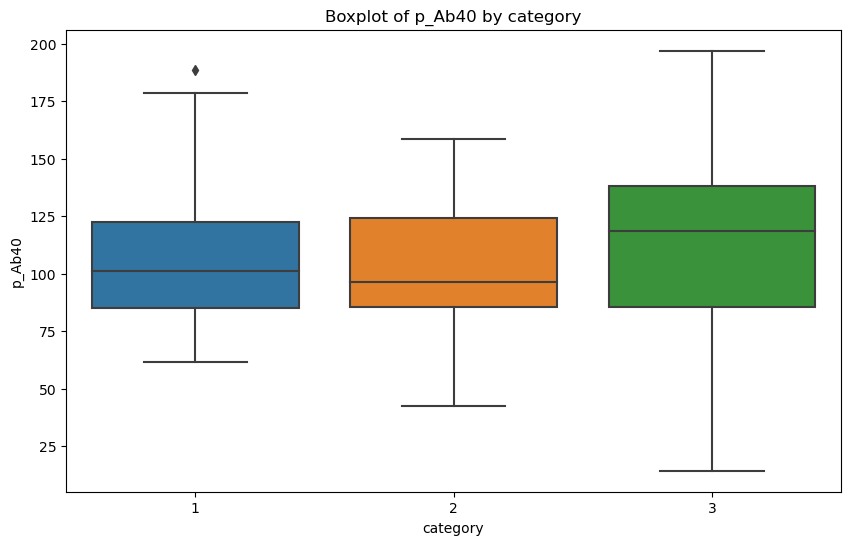

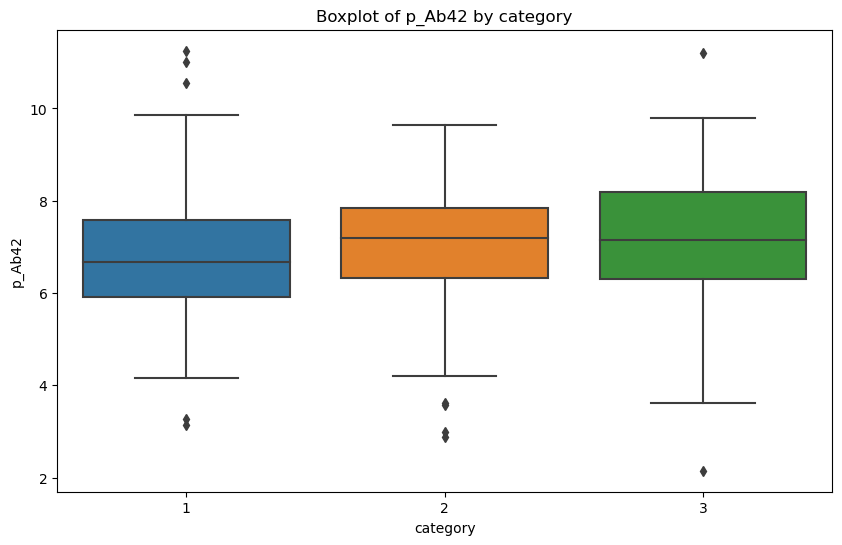

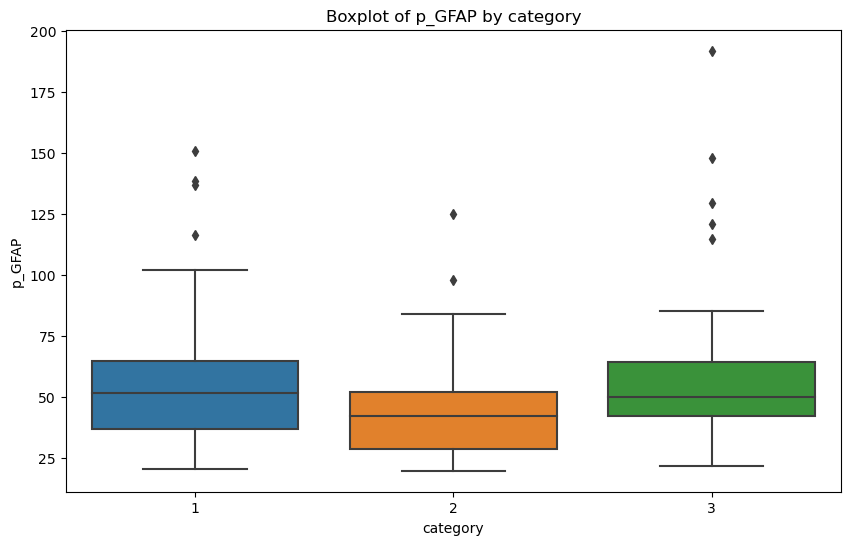

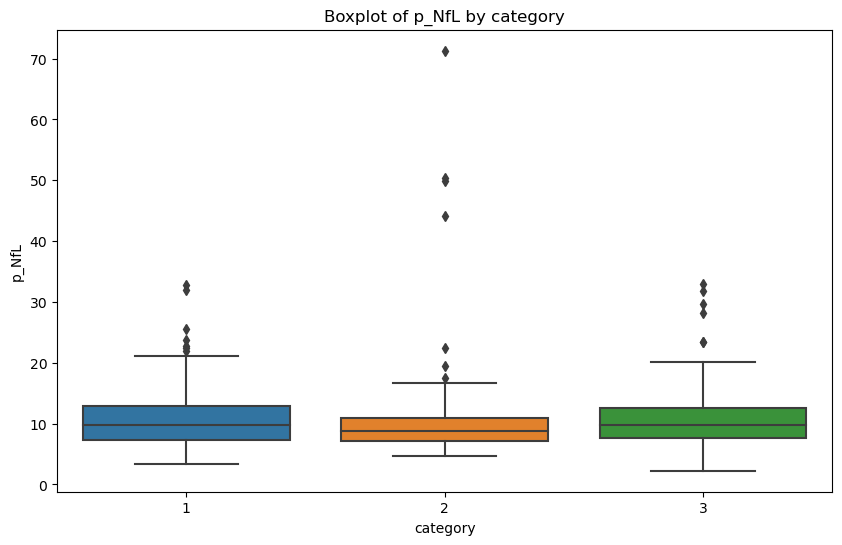

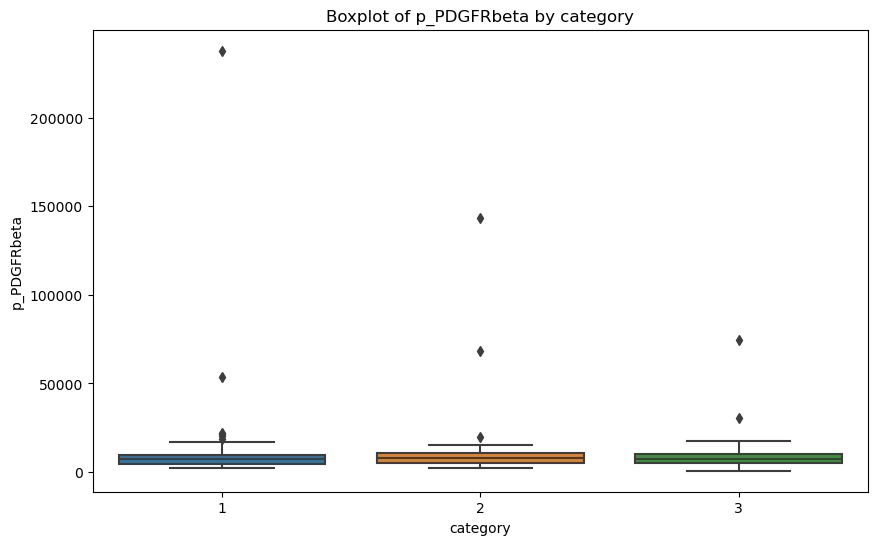

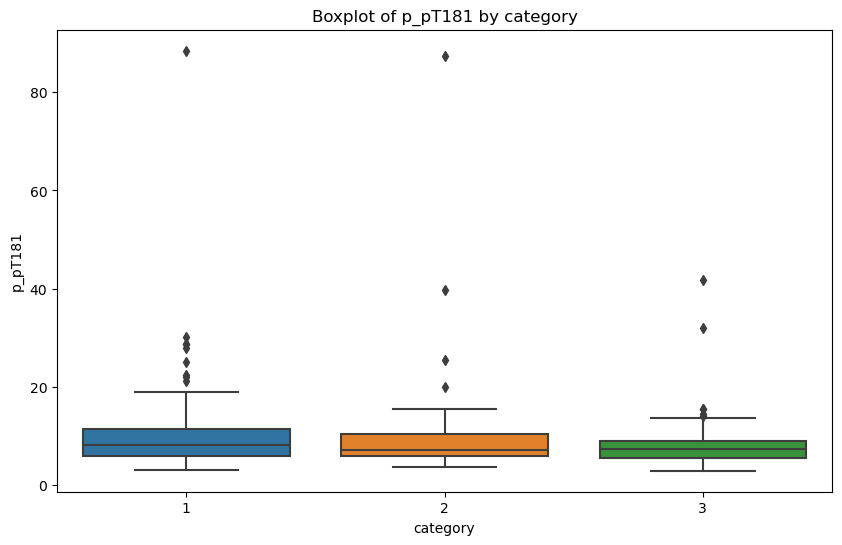

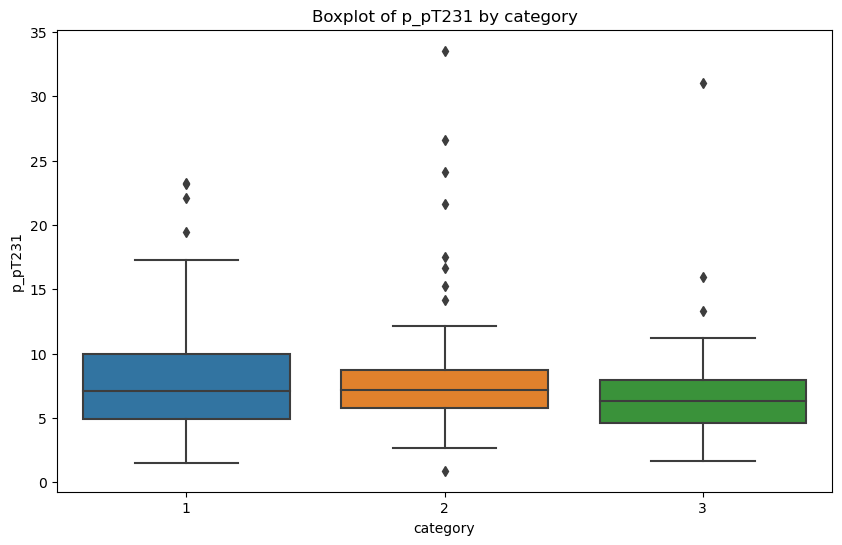

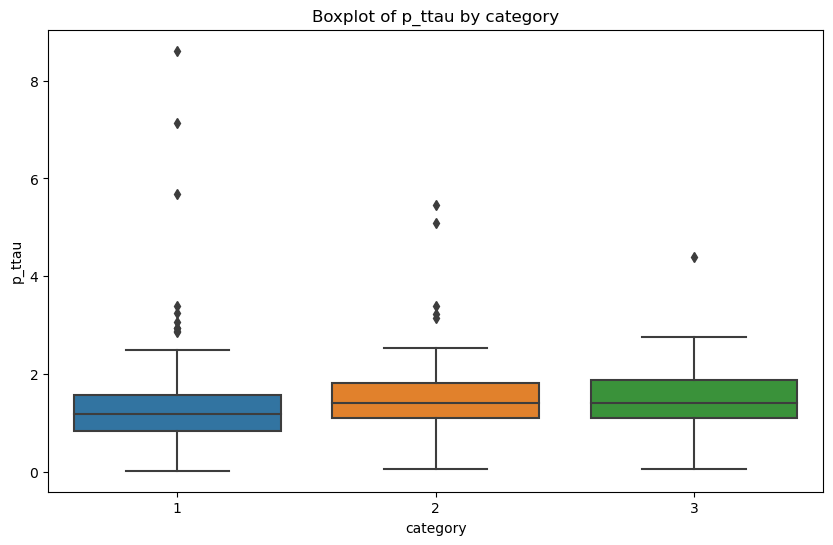

In [50]:
bloodbiomk1['category'] = briefa['category']

correlation_matrix = bloodbiomk1.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

# Alternatively, scatter plots for each feature vs y (checkin_bin)
for feature in bloodbiomk1.columns[:-1]:  # Exclude the label column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='category', y=feature, data=bloodbiomk1)
    plt.title(f'Boxplot of {feature} by category')
    plt.xlabel('category')
    plt.ylabel(feature)
    plt.show()


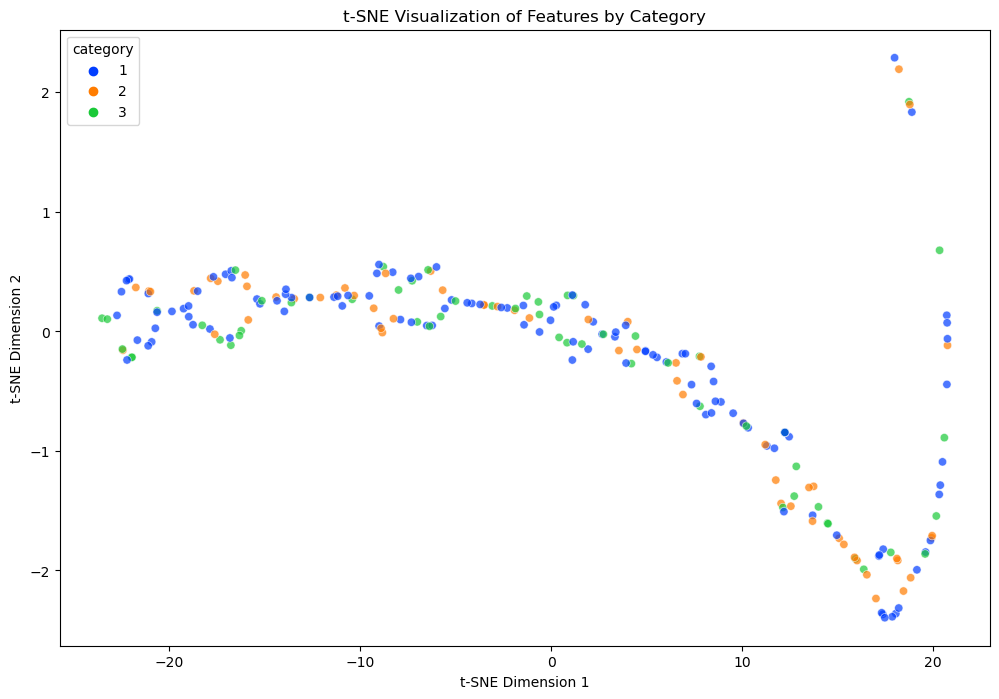

In [23]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming bloodbiomk1 is your DataFrame and it's already preprocessed.
# Remove the 'category' column for t-SNE computation and then reattach for coloring the plot.
features = bloodbiomk1.drop('category', axis=1)
categories = bloodbiomk1['category']

# t-SNE transformation
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)  # adjust perplexity and iterations as needed
tsne_results = tsne.fit_transform(features)

# Prepare DataFrame for plotting
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['category'] = categories

# Plotting t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='category', palette='bright', data=tsne_df, legend="full", alpha=0.7)
plt.title('t-SNE Visualization of Features by Category')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


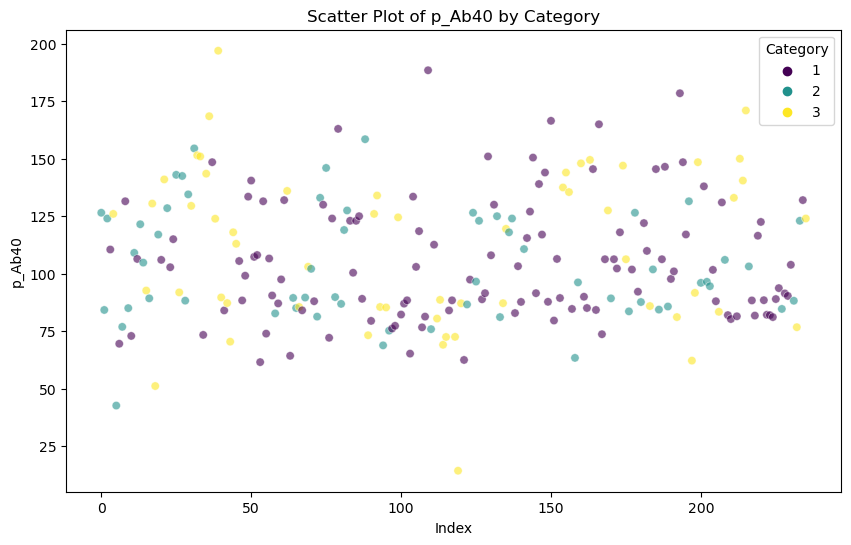

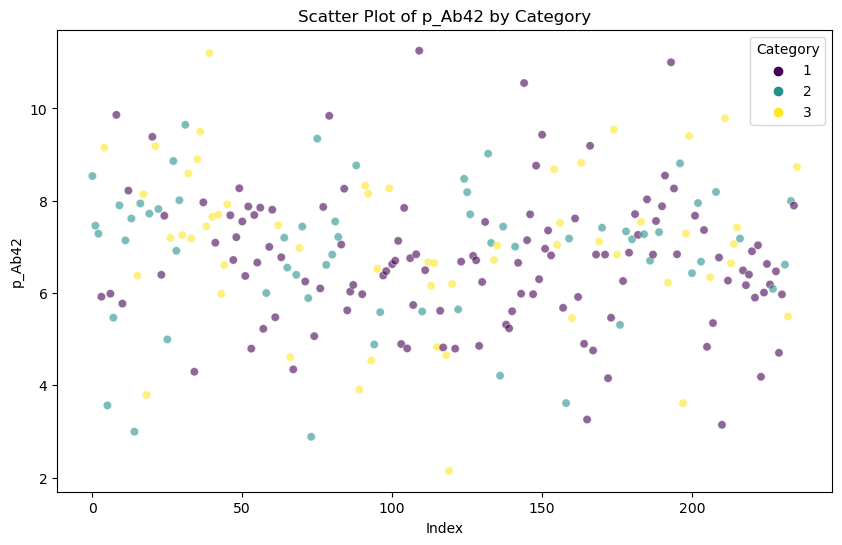

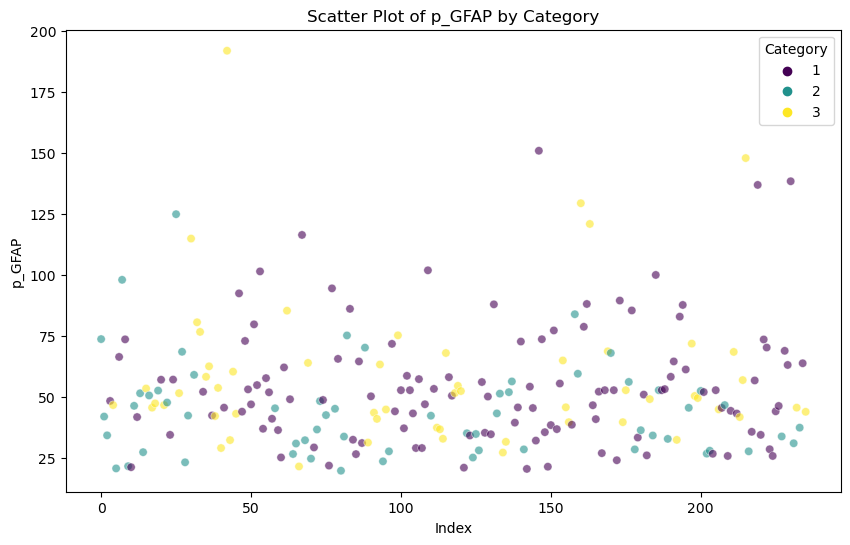

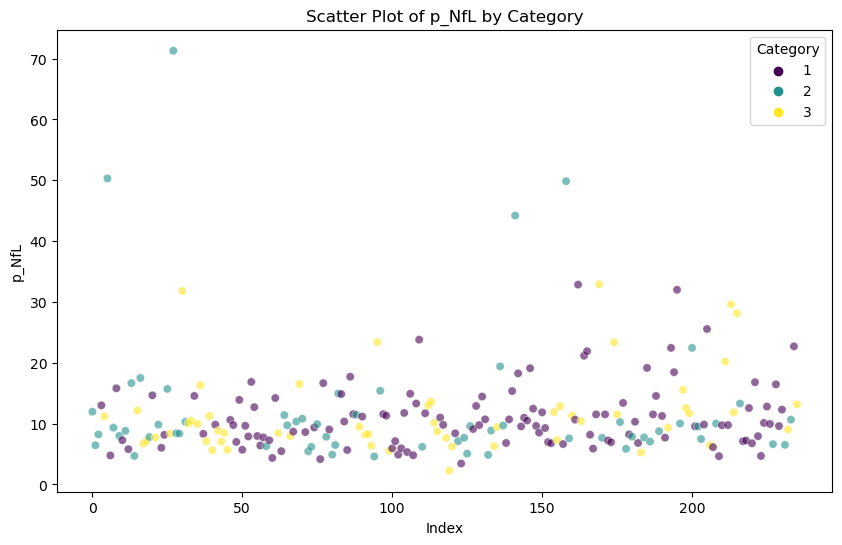

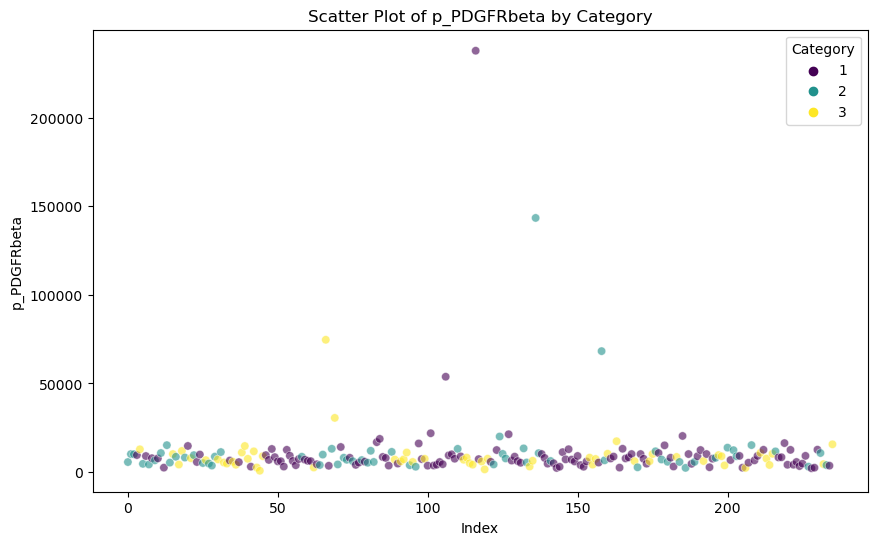

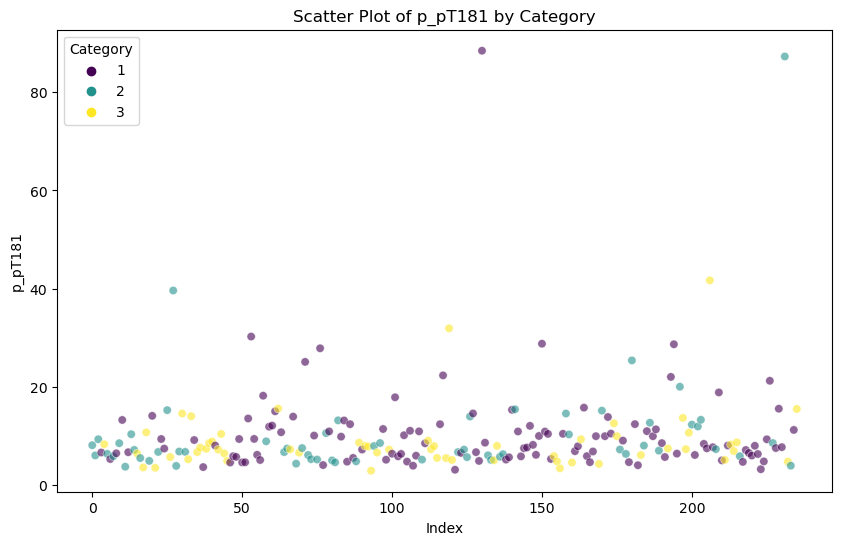

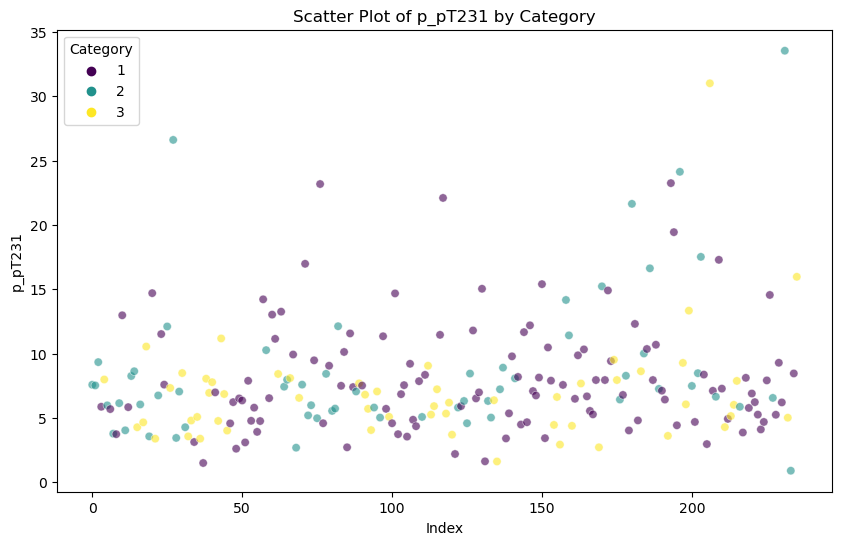

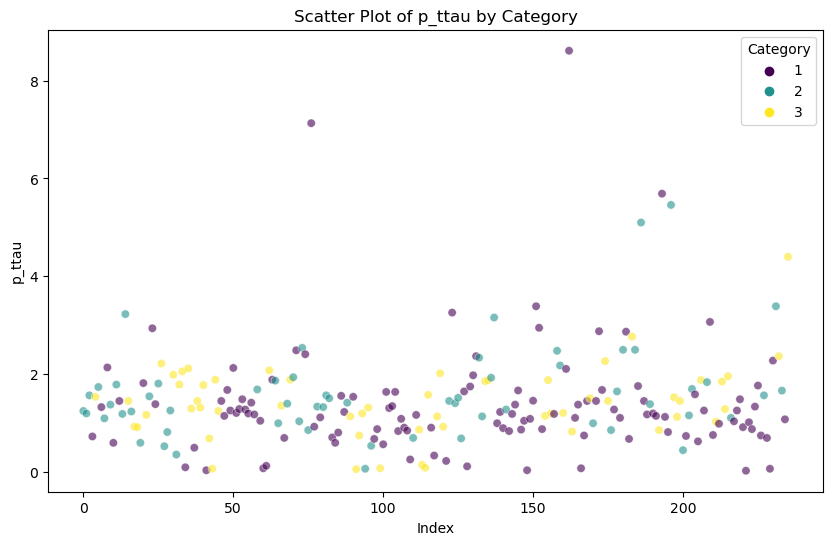

In [24]:
# Sactterplot
for feature in bloodbiomk1.columns[:-1]:  # Exclude the label column
    plt.figure(figsize=(10, 6))
    # Use the 'category' column to color the data points based on the category
    sns.scatterplot(x=bloodbiomk1.index, y=feature, hue='category', data=bloodbiomk1, palette='viridis', alpha=0.6)
    plt.title(f'Scatter Plot of {feature} by Category')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend(title='Category')
    plt.show()

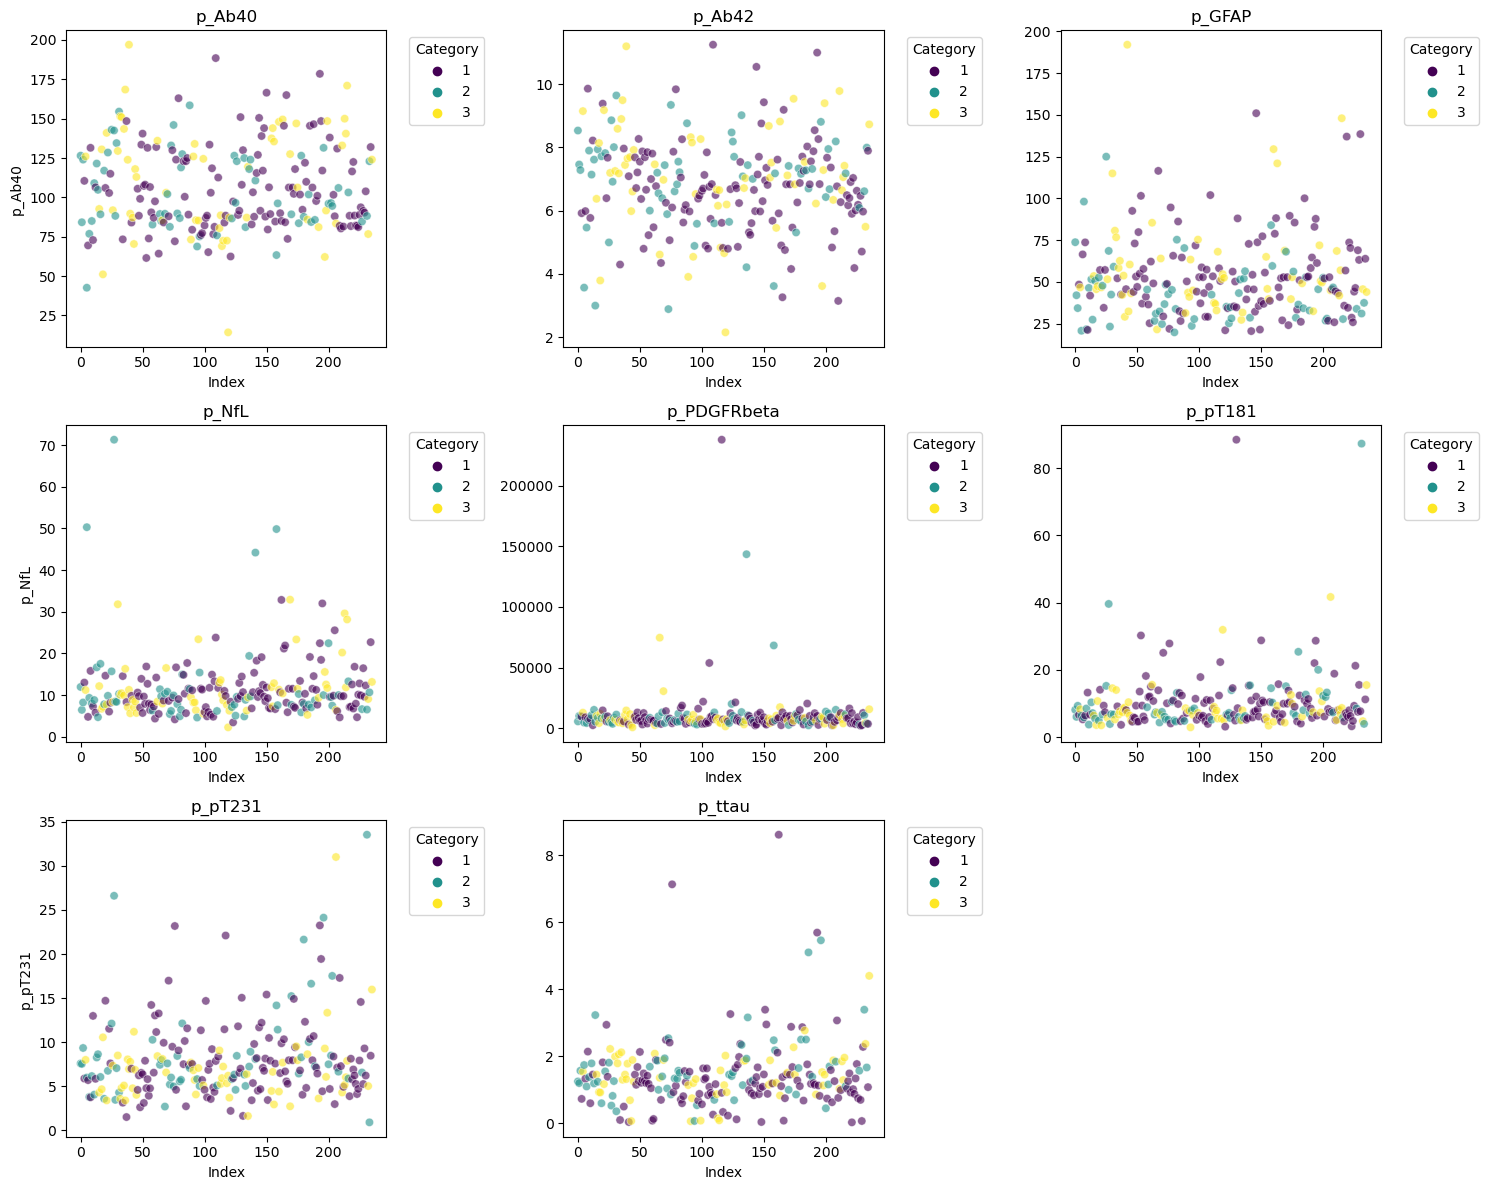

In [25]:
#Scatterplot as subplots

num_features = len(bloodbiomk1.columns) - 1

cols = 3  
rows = (num_features + cols - 1) // cols  

plt.figure(figsize=(cols * 5, rows * 4))  # Adjust overall figure size

for i, feature in enumerate(bloodbiomk1.columns[:-1]):  
    plt.subplot(rows, cols, i + 1)  
    sns.scatterplot(x=bloodbiomk1.index, y=feature, hue='category', data=bloodbiomk1, palette='viridis', alpha=0.6)
    plt.title(f'{feature}')
    plt.xlabel('Index')
    if i % cols == 0:  # Only set ylabel for the first column
        plt.ylabel(feature)
    else:
        plt.ylabel('')  # Remove y label for other columns to avoid clutter
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position outside plot

plt.tight_layout()  # Adjust layout to make it neat
plt.show()



# 95th percentile for both analysis and plotting

In [51]:
for feature in bloodbiomk1.columns[:-1]:  # Assuming 'category' is the last column
    upper_limit = bloodbiomk1[feature].quantile(0.95)  # Cap at 95th percentile
    lower_limit = bloodbiomk1[feature].quantile(0.05)  # Floor at 5th percentile
    bloodbiomk1[feature] = np.where(bloodbiomk1[feature] > upper_limit, upper_limit, bloodbiomk1[feature])
    bloodbiomk1[feature] = np.where(bloodbiomk1[feature] < lower_limit, lower_limit, bloodbiomk1[feature])

    

# Stop here and the n go to the initail steps for anlaysis

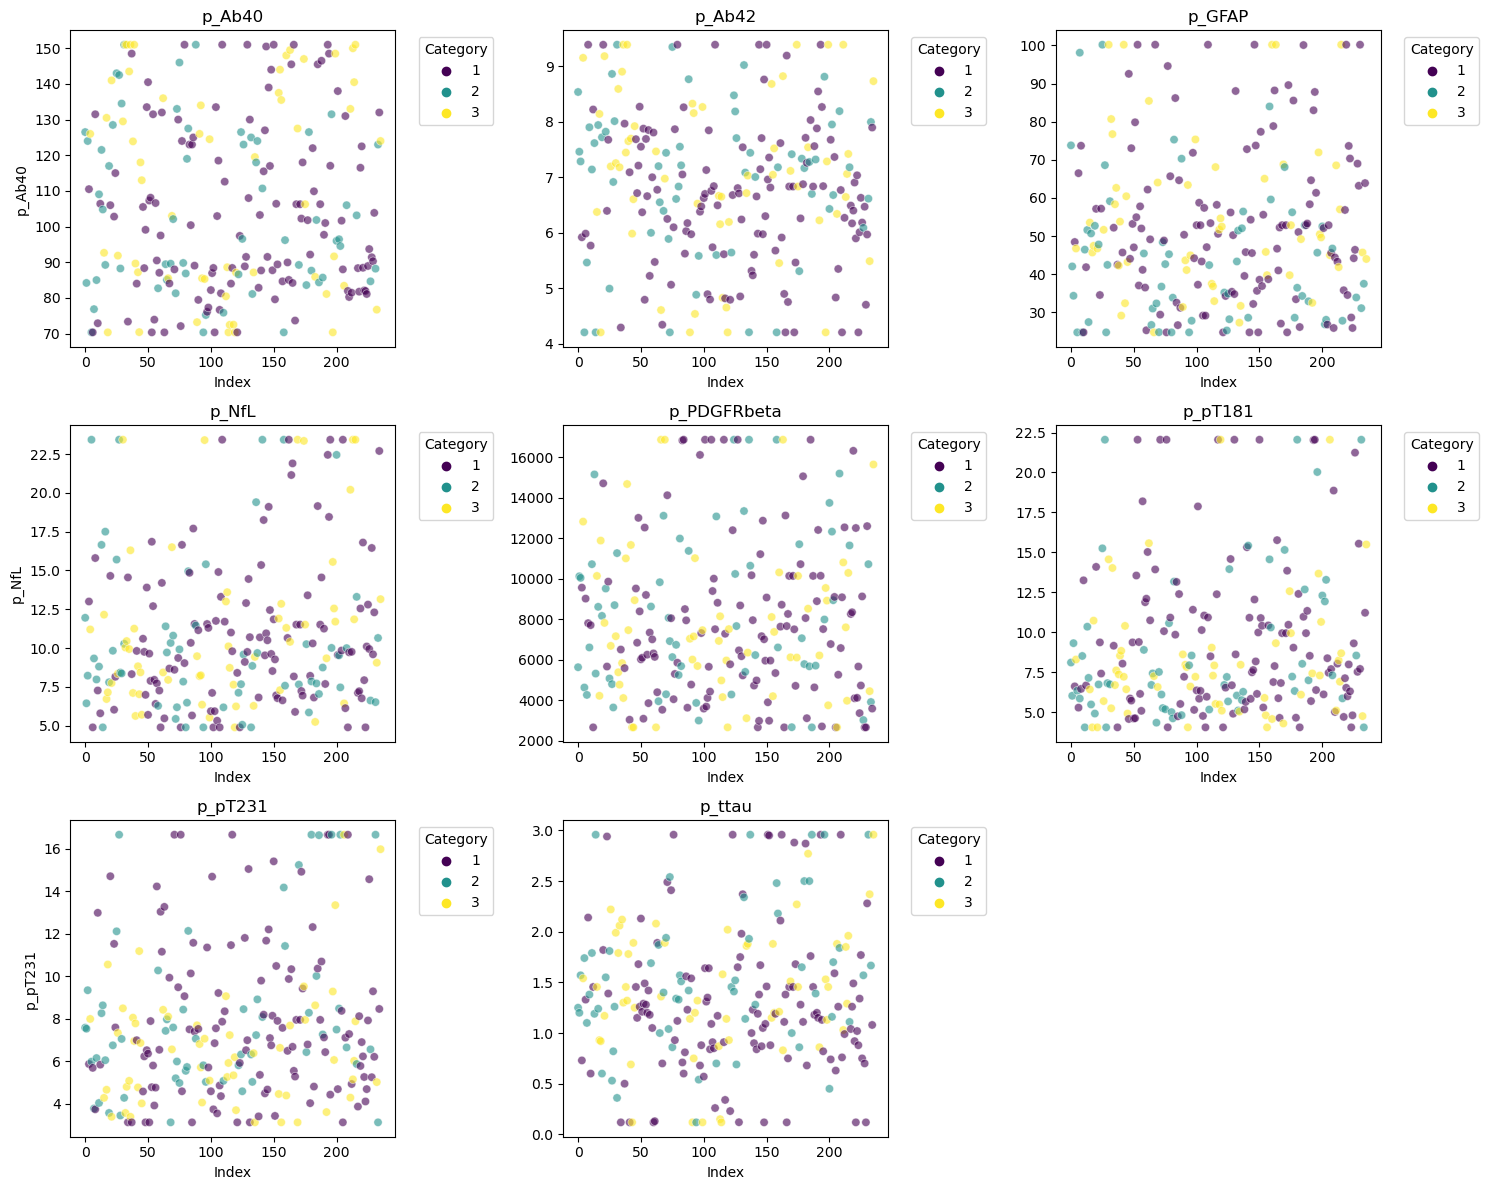

In [28]:
#Scatterplot as subplots

num_features = len(bloodbiomk1.columns) - 1

cols = 3  
rows = (num_features + cols - 1) // cols  

plt.figure(figsize=(cols * 5, rows * 4))  # Adjust overall figure size

for i, feature in enumerate(bloodbiomk1.columns[:-1]):  
    plt.subplot(rows, cols, i + 1)  
    sns.scatterplot(x=bloodbiomk1.index, y=feature, hue='category', data=bloodbiomk1, palette='viridis', alpha=0.6)
    plt.title(f'{feature}')
    plt.xlabel('Index')
    if i % cols == 0:  # Only set ylabel for the first column
        plt.ylabel(feature)
    else:
        plt.ylabel('')  # Remove y label for other columns to avoid clutter
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position outside plot

plt.tight_layout()  # Adjust layout to make it neat
plt.show()


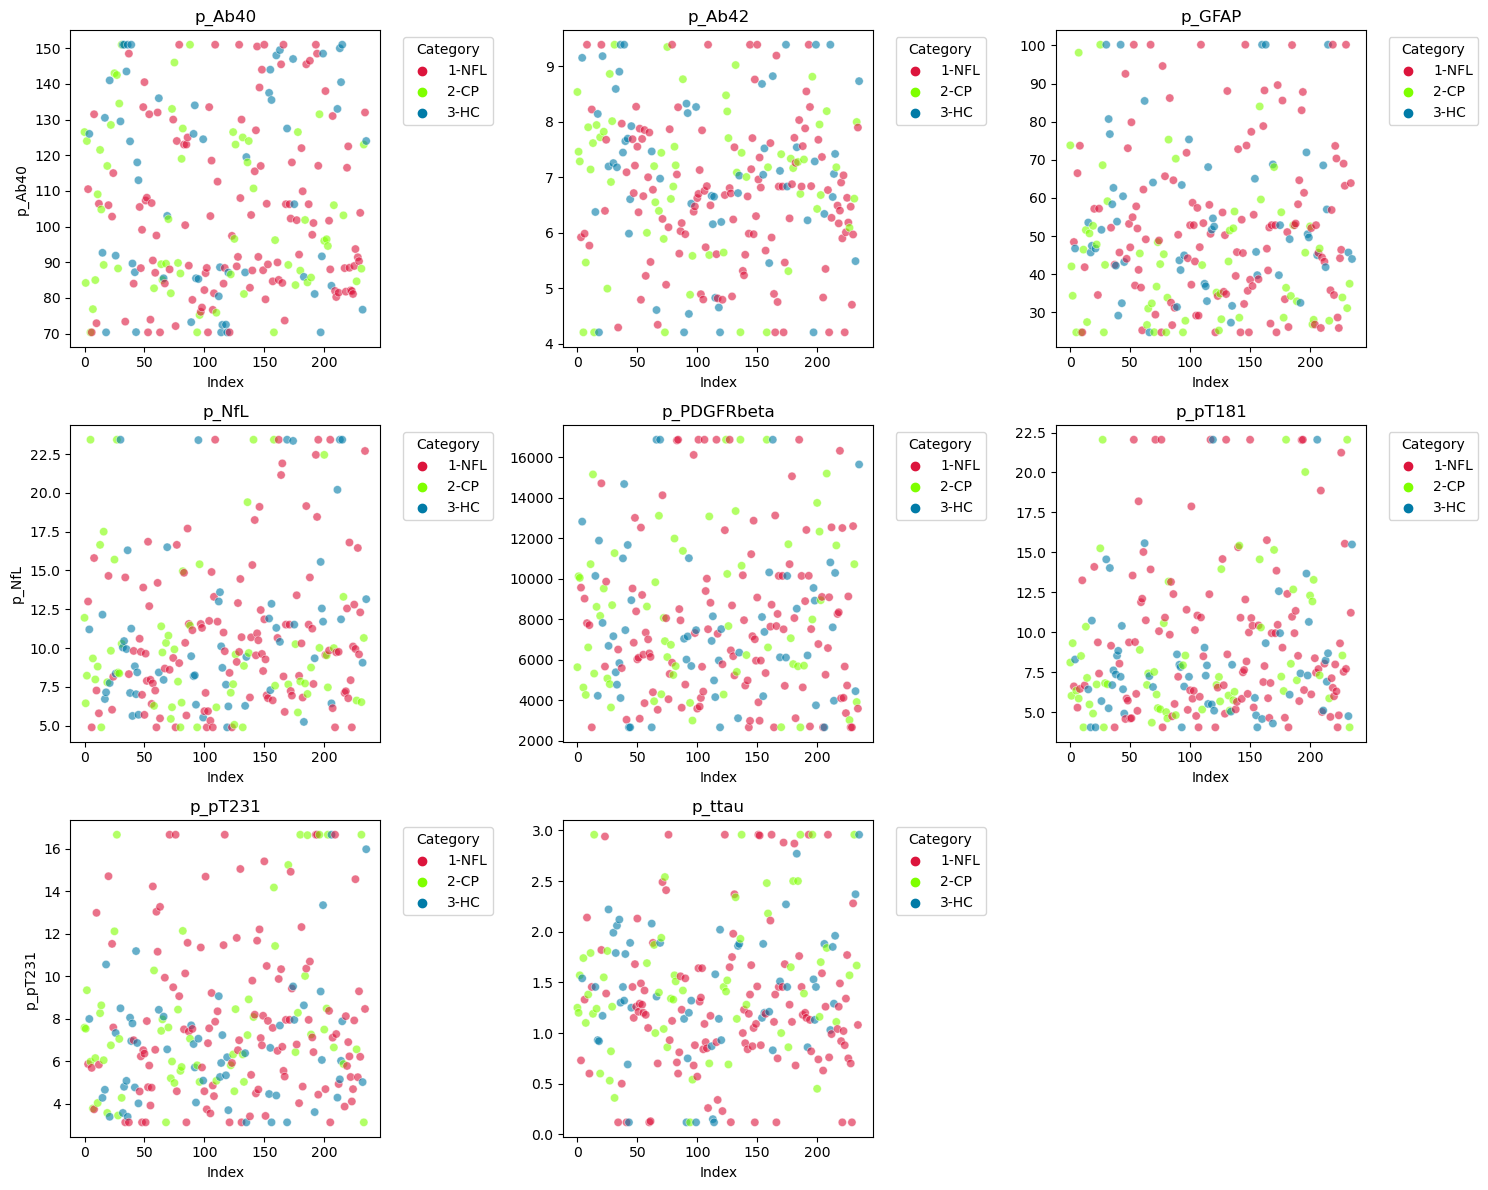

In [29]:
bloodbiomk1['category_label'] = bloodbiomk1['category'].map({1: '1-NFL', 2: '2-CP', 3: '3-HC'})
hue_order = ['1-NFL', '2-CP', '3-HC']

# Make a copy to reduce fragmentation
bloodbiomk1 = bloodbiomk1.copy()

num_features = len(bloodbiomk1.columns) - 2  # adjusting for category and category_label
cols = 3
rows = (num_features + cols - 1) // cols

plt.figure(figsize=(cols * 5, rows * 4))

for i, feature in enumerate(bloodbiomk1.columns[:-2]):  # avoid category and category_label
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(x=bloodbiomk1.index, y=feature, hue='category_label', data=bloodbiomk1,
                    palette={'1-NFL': '#DC143C', '2-CP': '#7FFF00', '3-HC': '#007BA7'}, alpha=0.6,hue_order=hue_order)
    plt.title(f'{feature}')
    plt.xlabel('Index')
    if i % cols == 0:
        plt.ylabel(feature)
    else:
        plt.ylabel('')
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

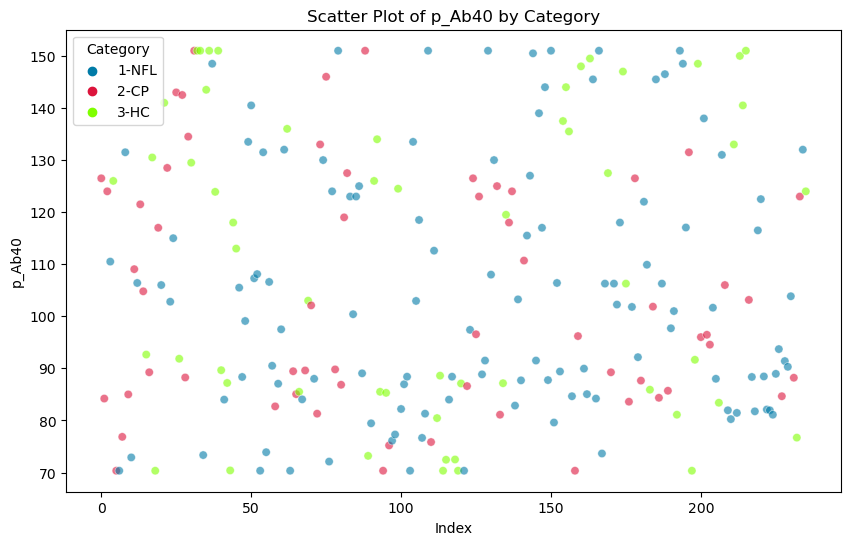

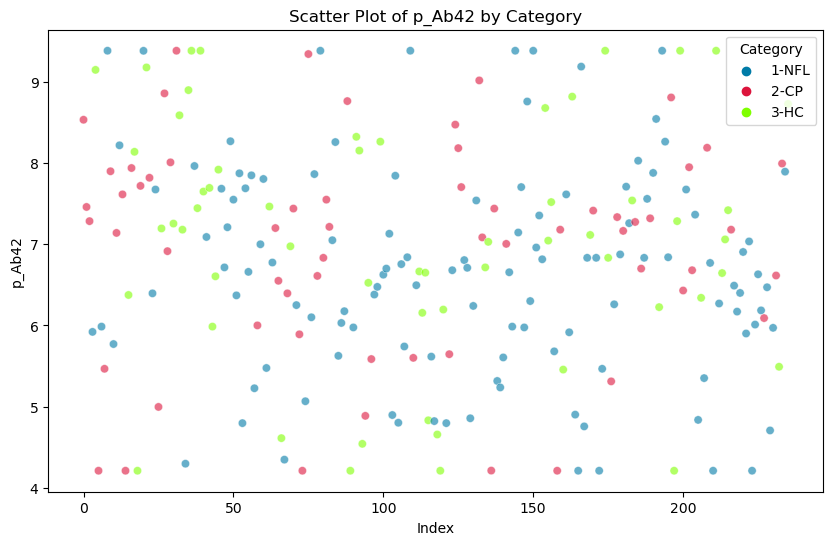

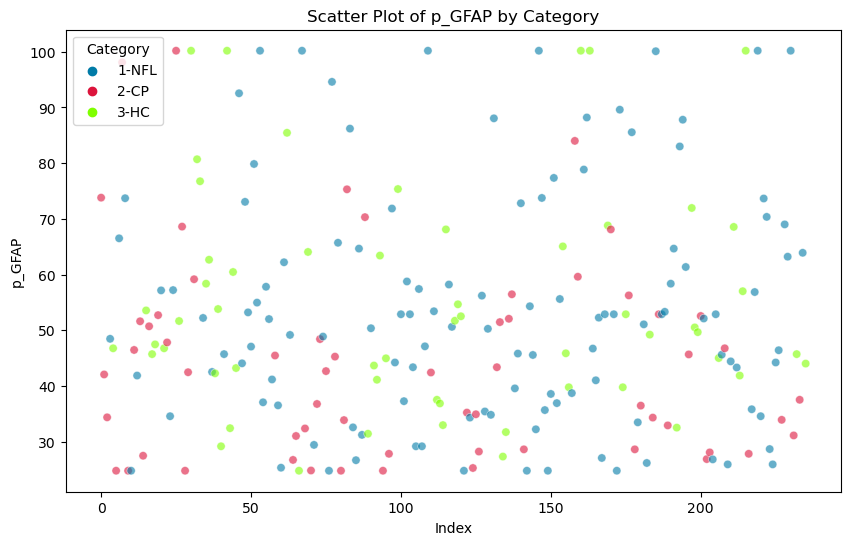

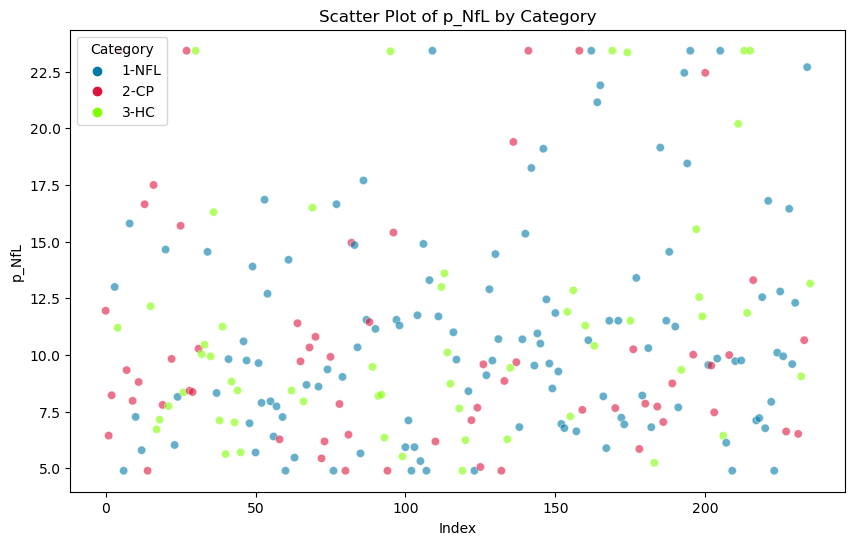

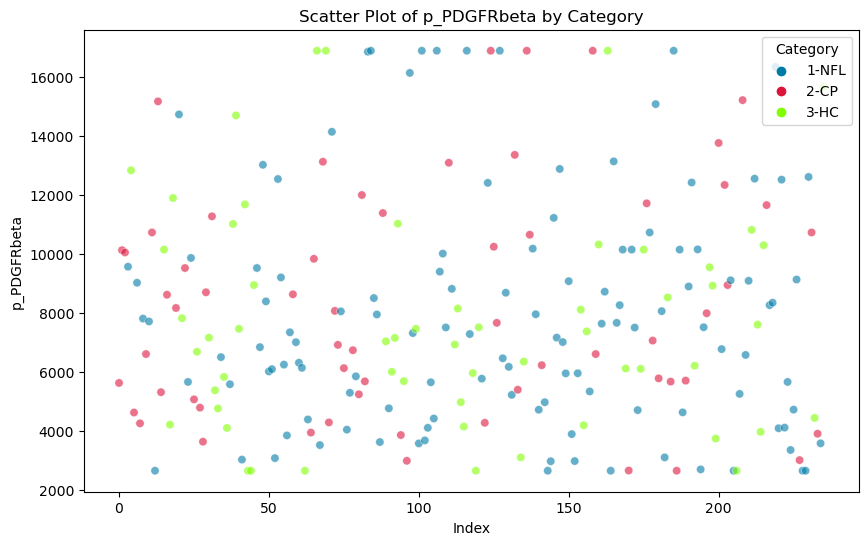

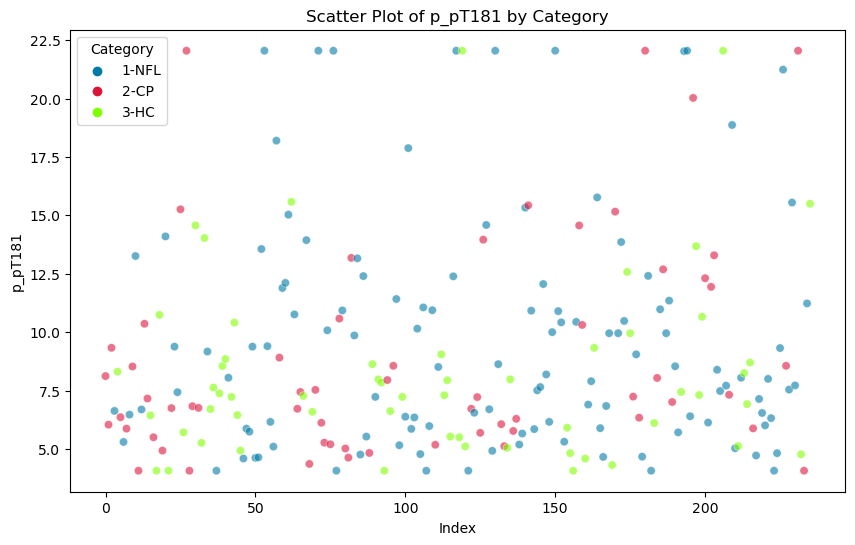

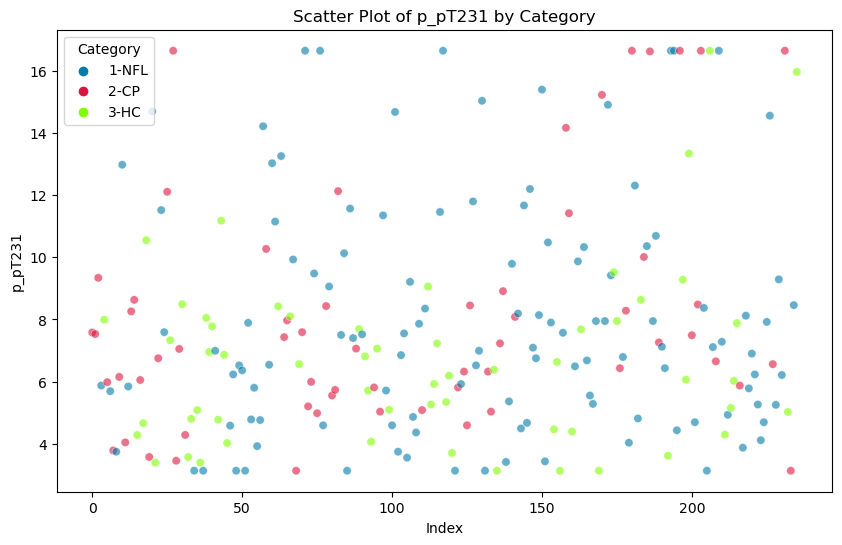

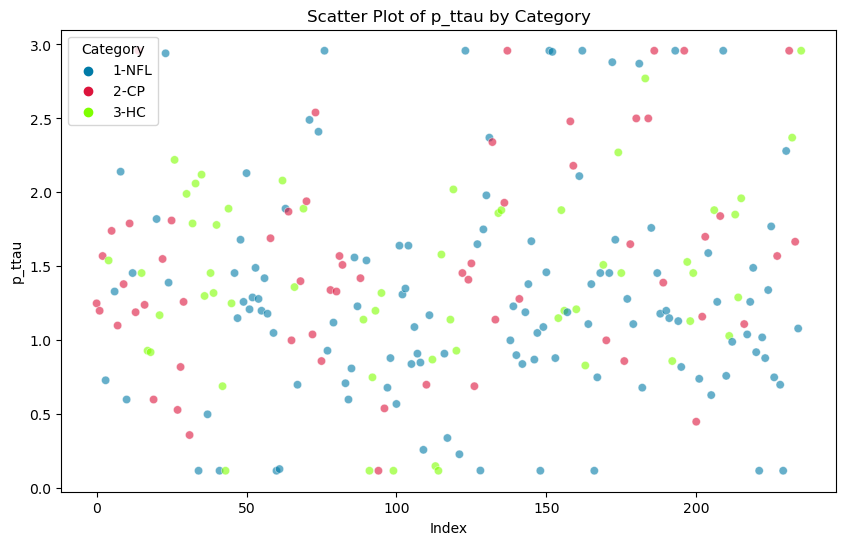

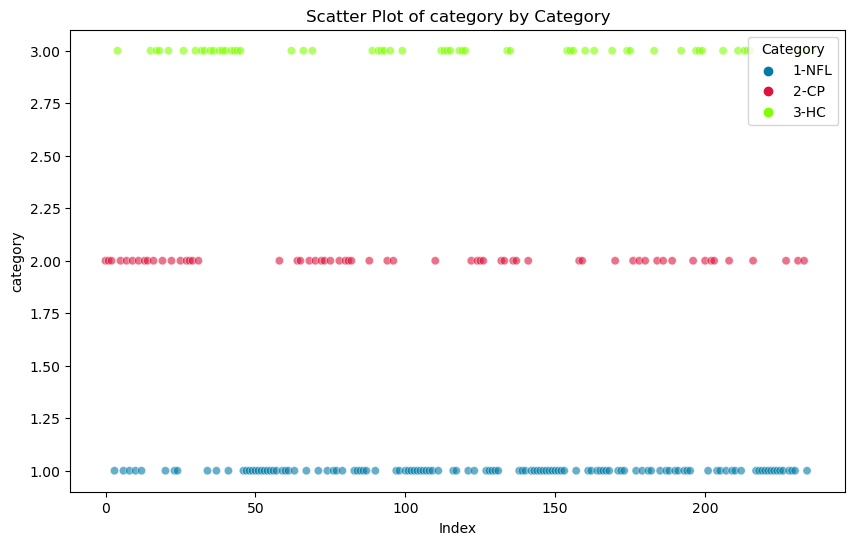

In [30]:
# Custom color palette and order
custom_palette = {'1-NFL': '#007BA7', '2-CP': '#DC143C', '3-HC': '#7FFF00'}
hue_order = ['1-NFL', '2-CP', '3-HC']

# Loop through each feature to create and save plots
for i, feature in enumerate(bloodbiomk1.columns[:-1]):  # Assuming the last column is 'category_label'
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=bloodbiomk1.index, y=feature, hue='category_label', data=bloodbiomk1,
                    palette=custom_palette, alpha=0.6, hue_order=hue_order)
    plt.title(f'Scatter Plot of {feature} by Category')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend(title='Category')

    # Specify the filename for each plot
    filename = f"{feature}_distribution_by_category.png"
    file_path = f"{save_path}/{filename}"  # Construct the full file path

    plt.savefig(file_path)
#     plt.close()  

In [31]:
num_features = len(bloodbiomk1.columns) - 1
cols = 3
rows = 3  # Fixed to 3x3 grid per figure
num_plots_per_figure = cols * rows

# Loop through features and create subplots in batches of 9
for i in range(0, num_features, num_plots_per_figure):
    plt.figure(figsize=(15, 10))  # Increase overall figure size for better visibility
    for j in range(num_plots_per_figure):
        if i + j < num_features:  # Check if the feature index exists
            plt.subplot(rows, cols, j + 1)
            feature = bloodbiomk1.columns[i + j]
            sns.scatterplot(x=bloodbiomk1.index, y=feature, hue='category_label', data=bloodbiomk1,
                            palette=custom_palette, alpha=0.6, hue_order=hue_order, s=50)
            plt.title(f'{feature}', fontsize=10)  # Adjust subplot title size
            plt.xlabel('', fontsize=9)  # Adjust subplot x-axis label size
            plt.ylabel(feature, fontsize=9)  # Adjust subplot y-axis label size
            plt.legend(title='Category', title_fontsize='9', fontsize='8', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust subplot legend size

    # Save each figure
    figure_filename = f"bloodbiomk1_grid_{i // num_plots_per_figure + 1}.png"
    figure_path = f"{save_path}/{figure_filename}"
    plt.savefig(figure_path, dpi=300)  # High resolution
    plt.close()



In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = len(bloodbiomk1.columns) - 1
cols = 3
rows = 3  # Fixed to 3x3 grid per figure
num_plots_per_figure = cols * rows

# Loop through features and create subplots in batches of 9
for i in range(0, num_features, num_plots_per_figure):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Use subplots to manage the grid and axes
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    for j in range(num_plots_per_figure):
        ax = axes[j]  # Current axis
        if i + j < num_features:  # Check if the feature index exists
            feature = bloodbiomk1.columns[i + j]
            sns.scatterplot(x=bloodbiomk1.index, y=feature, hue='category_label', data=bloodbiomk1,
                            palette=custom_palette, alpha=0.6, hue_order=hue_order, s=50, ax=ax)
            ax.set_title(f'{feature}', fontsize=10)  # Adjust subplot title size
            ax.set_xlabel('', fontsize=9)  # Adjust subplot x-axis label size
            ax.set_ylabel(feature, fontsize=9)  # Adjust subplot y-axis label size
            ax.legend_.remove()  # Remove individual subplot legends
        else:
            fig.delaxes(ax)  # Remove unused axes if the number of plots is less than the grid size

    # Create a single shared legend
    handles, labels = ax.get_legend_handles_labels()  # Get legend handles and labels from the last used axis
    fig.legend(handles, labels, title='Category', title_fontsize='9', fontsize='8', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()  # Adjust layout to make it neat
    # Save each figure
    figure_filename = f"bloodbiomk1_grid_{i // num_plots_per_figure + 1}.png"
    figure_path = f"{save_path}/{figure_filename}"
    plt.savefig(figure_path, dpi=300, bbox_inches='tight')  # High resolution and adjust bounding box to include legend
    plt.close()


In [37]:
# # got error due to non numeric values, so removing them:

# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # Assume bloodbiomk1 is your DataFrame loaded with various types of data
# X = bloodbiomk1.copy()

# # Select only numeric columns from the DataFrame
# X_numeric = X.select_dtypes(include=[np.number])
# X = X_numeric

# # Now X_numeric contains only the numeric columns of the original DataFrame
# # Proceed with scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split into training and testing sets
# X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)


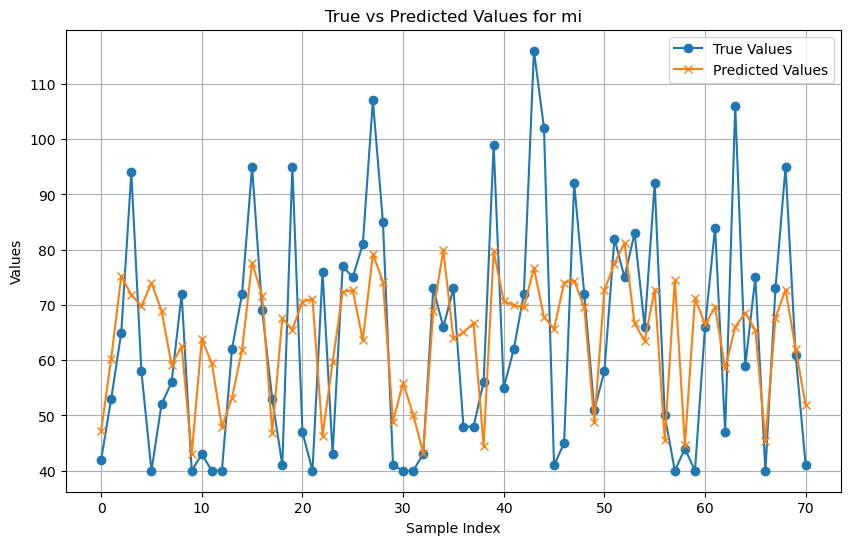

Column: mi, Mean Squared Error: 306.7627128325509, Mean Absolute Error: 14.144647887323945, R²: 0.27321763116192377


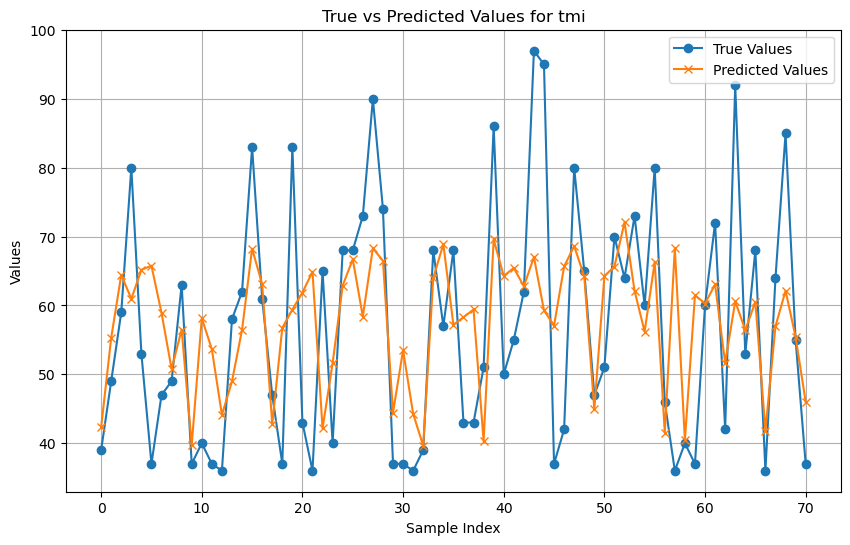

Column: tmi, Mean Squared Error: 218.44185931142408, Mean Absolute Error: 11.859765258215964, R²: 0.26624290655505223


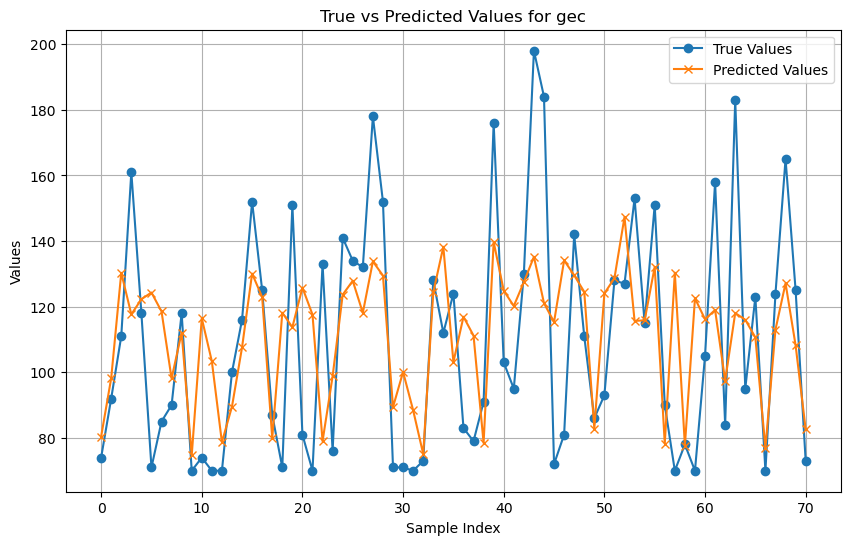

Column: gec, Mean Squared Error: 889.3385618153363, Mean Absolute Error: 23.803286384976527, R²: 0.2683130509109275


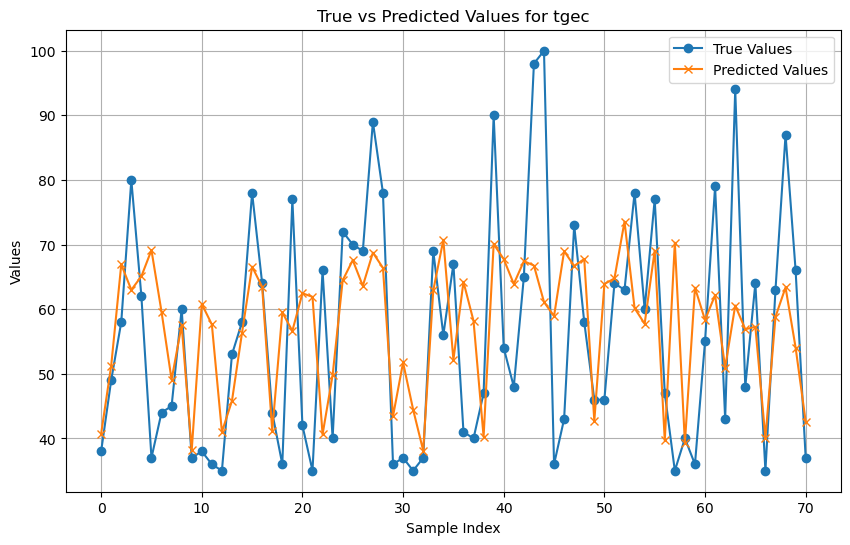

Column: tgec, Mean Squared Error: 254.4899905054773, Mean Absolute Error: 12.670408450704223, R²: 0.2070331072659698


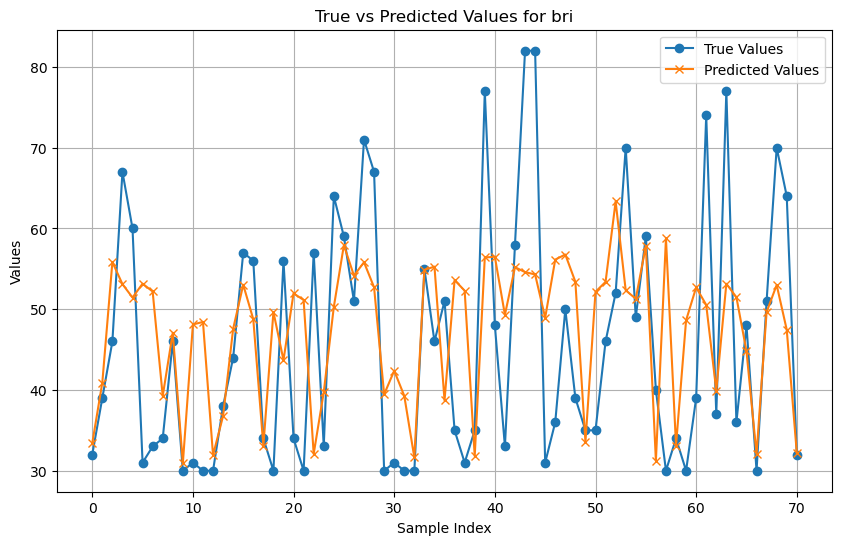

Column: bri, Mean Squared Error: 188.61563802816897, Mean Absolute Error: 11.028591549295776, R²: 0.18198369897568534


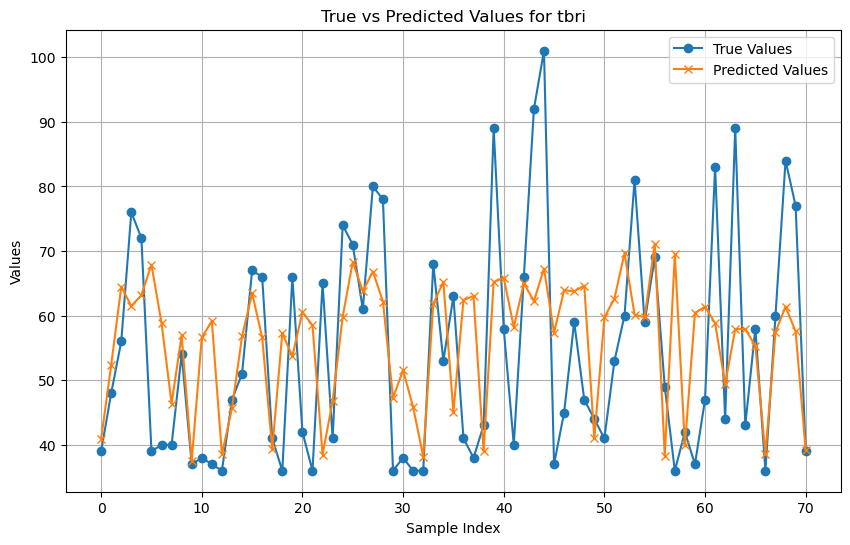

Column: tbri, Mean Squared Error: 242.9043052535212, Mean Absolute Error: 12.542558685446009, R²: 0.16937513039015895


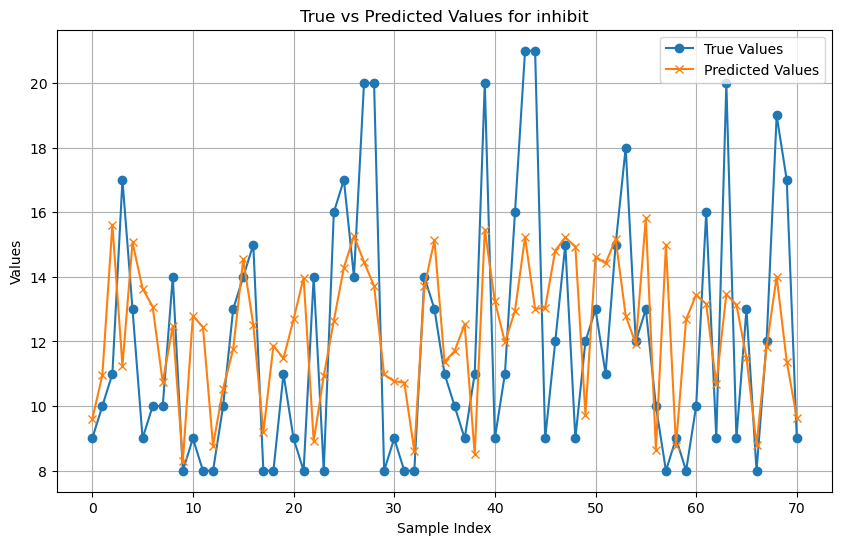

Column: inhibit, Mean Squared Error: 11.963428507042249, Mean Absolute Error: 2.8153943661971836, R²: 0.18151457474010002


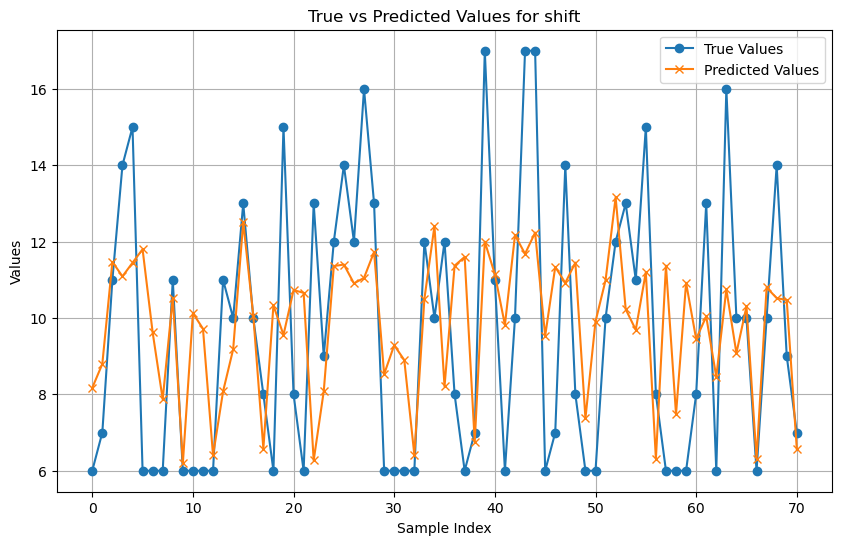

Column: shift, Mean Squared Error: 9.59699607511737, Mean Absolute Error: 2.5697652582159627, R²: 0.2104054640987978


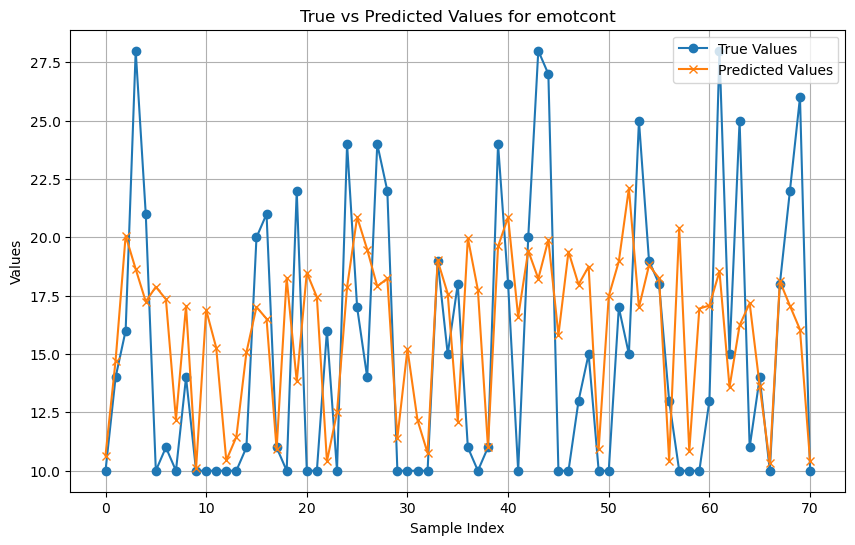

Column: emotcont, Mean Squared Error: 29.206878873239436, Mean Absolute Error: 4.399154929577465, R²: 0.11677478793986718


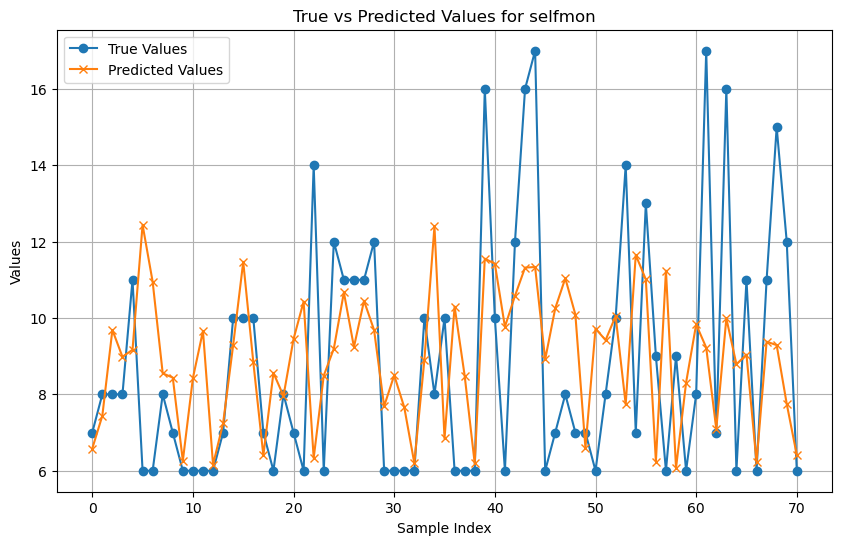

Column: selfmon, Mean Squared Error: 9.938580534428795, Mean Absolute Error: 2.4890985915492956, R²: 0.00138759270369615


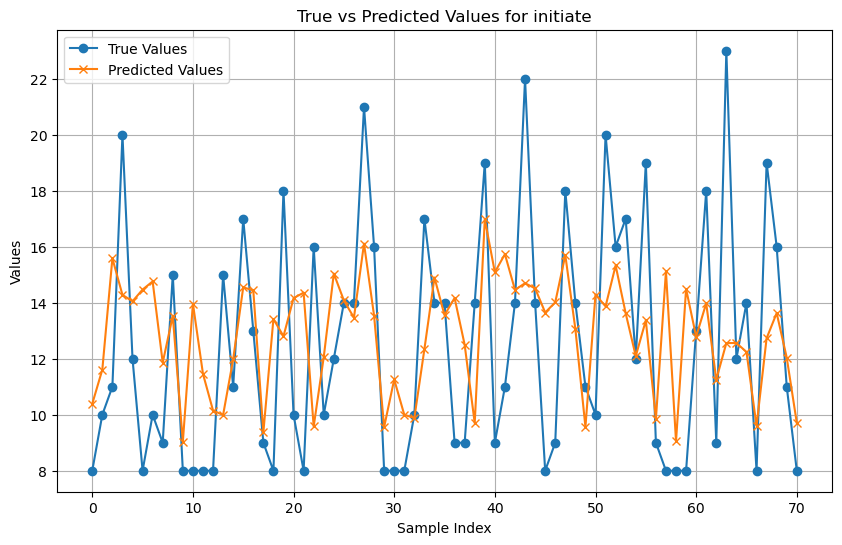

Column: initiate, Mean Squared Error: 15.312803480438182, Mean Absolute Error: 3.1790234741784036, R²: 0.12156221015443847


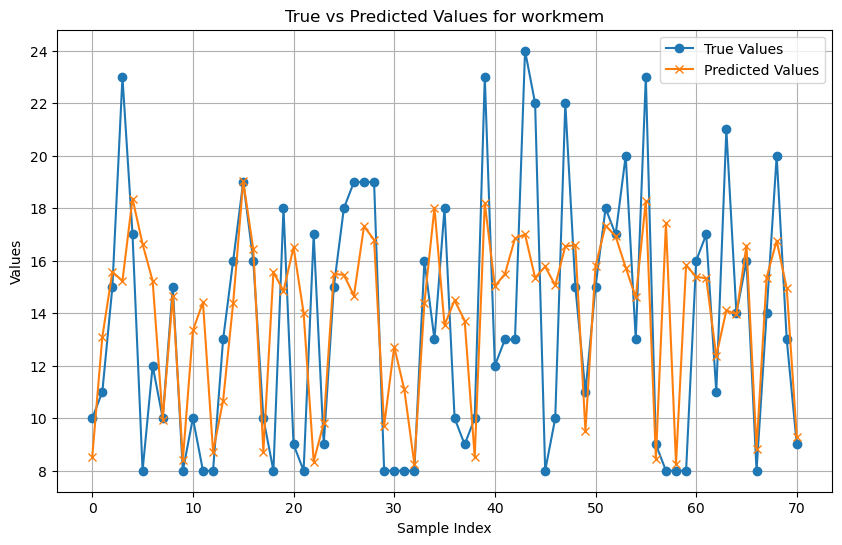

Column: workmem, Mean Squared Error: 16.118979019953056, Mean Absolute Error: 3.053955399061033, R²: 0.2956086095254399


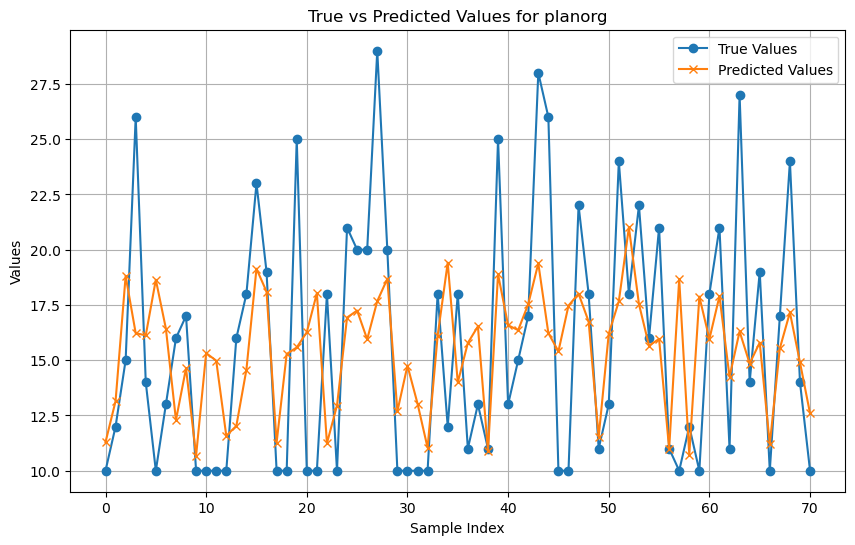

Column: planorg, Mean Squared Error: 23.889523173708916, Mean Absolute Error: 3.9825070422535194, R²: 0.2247516008840823


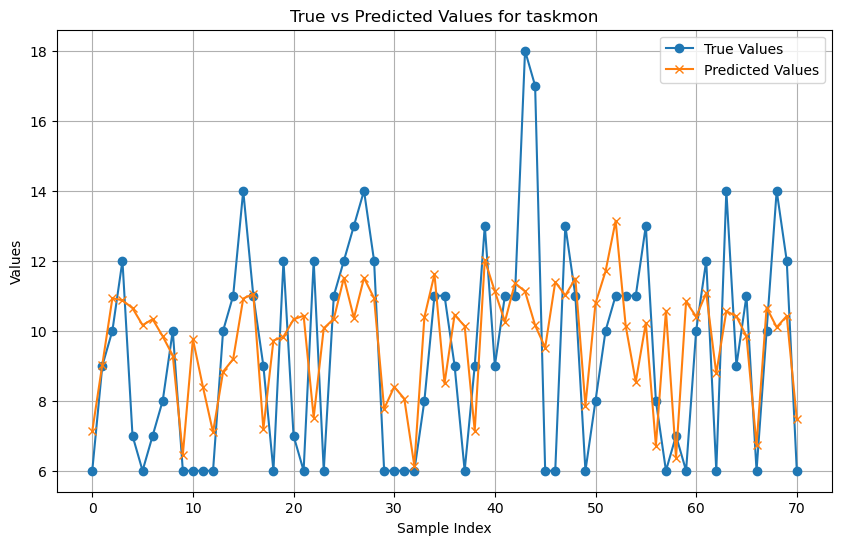

Column: taskmon, Mean Squared Error: 7.139058768779342, Mean Absolute Error: 2.183988262910798, R²: 0.2011189119735246


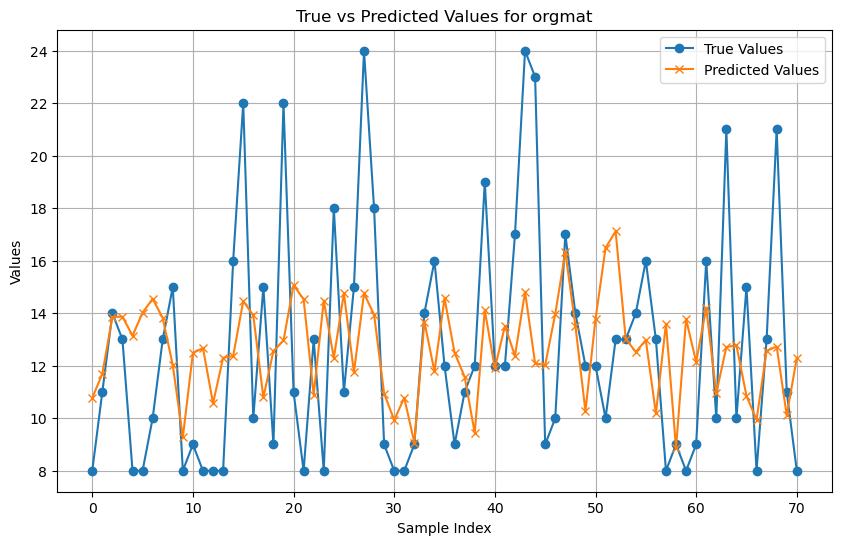

Column: orgmat, Mean Squared Error: 18.43285523787167, Mean Absolute Error: 3.480483568075118, R²: 0.05077103632535407


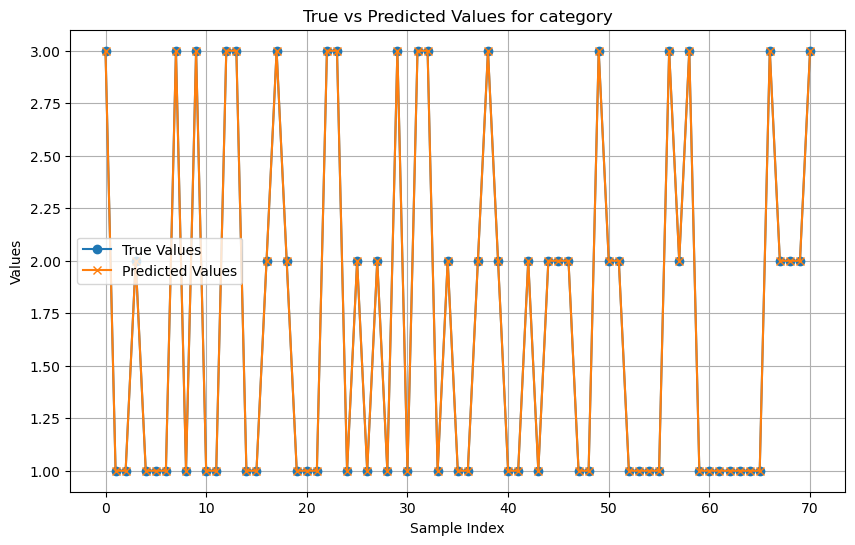

Column: category, Mean Squared Error: 0.0, Mean Absolute Error: 0.0, R²: 1.0


In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {}
predictions = {}

for column in briefa.columns:
    y = briefa[column]  
    X = bloodbiomk1
    X = X.select_dtypes(include=[np.number])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)  
    X_test_scaled = scaler.transform(X_test) 
    
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)

    models[column] = model

    y_pred = model.predict(X_test_scaled)
    predictions[column] = y_pred

    plt.figure(figsize=(10, 6))
    plt.plot(y_test.reset_index(drop=True), label='True Values', marker='o')
    plt.plot(y_pred, label='Predicted Values', marker='x')
    plt.title(f'True vs Predicted Values for {column}')
    plt.xlabel('Sample Index')
    plt.ylabel('Values')
    plt.legend()
    plt.grid()
    
    file_name = f"{column}_true_vs_predicted.png"  
#     plt.savefig(os.path.join(save_path, file_name), bbox_inches='tight')  
    plt.show()

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Column: {column}, Mean Squared Error: {mse}, Mean Absolute Error: {mae}, R²: {r2}")

# Initial Step for Trainings

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# got error due to non numeric values, so removing them:

# Assume bloodbiomk1 is your DataFrame loaded with various types of data
X = bloodbiomk1.copy()

# Select only numeric columns from the DataFrame
X_numeric = X.select_dtypes(include=[np.number])
X = X_numeric

# Now X_numeric contains only the numeric columns of the original DataFrame
# Proceed with scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)


models = {}
predictions = {}


X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)

In [53]:
# Define the columns you want to select for modeling
## columns = ['mi', 'tmi','gec','tgec','bri','tbri','inhibit','shift','emotcont','selfmon','initiate','workmem','planorg','taskmon','orgmat'] 
# selected_columns = ['mi']  # Replace 'column1' and 'column2' with the actual column names

selected_columns = ['mi', 'tmi','gec','tgec','bri','tbri','inhibit','shift','emotcont','selfmon','initiate','workmem','planorg','taskmon','orgmat']  # Replace 'column1' and 'column2' with the actual column names


In [54]:
selected_columns

['mi',
 'tmi',
 'gec',
 'tgec',
 'bri',
 'tbri',
 'inhibit',
 'shift',
 'emotcont',
 'selfmon',
 'initiate',
 'workmem',
 'planorg',
 'taskmon',
 'orgmat']

# Bringing Categories and setting color

In [55]:
custom_palette = {1: '#007BA7', 2: '#DC143C', 3: '#7FFF00'}
hue_order = ['1-NFL', '2-CP', '3-HC']

In [56]:
categories_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\categories.csv"
categories_df = pd.read_csv(categories_file_path)
new_column = categories_df['checkin_bin']
briefa['category'] = new_column
print(briefa.head())

    mi  tmi  gec  tgec  bri  tbri  inhibit  shift  emotcont  selfmon  \
0   75   64  114    57   39    46       12      9        11        7   
1  101   85  171    85   70    79       17     15        23       15   
2   90   77  158    79   68    77       15     14        27       12   
3   43   40   81    42   38    46        9      8        15        6   
4   43   39   81    41   38    45        9     11        12        6   

   initiate  workmem  planorg  taskmon  orgmat  category  
0        14       17       20       13      11         2  
1        19       24       27       15      16         2  
2        20       22       22       14      12         2  
3         9        8       11        7       8         1  
4        10        8       10        7       8         3  


# Bar plots based on category

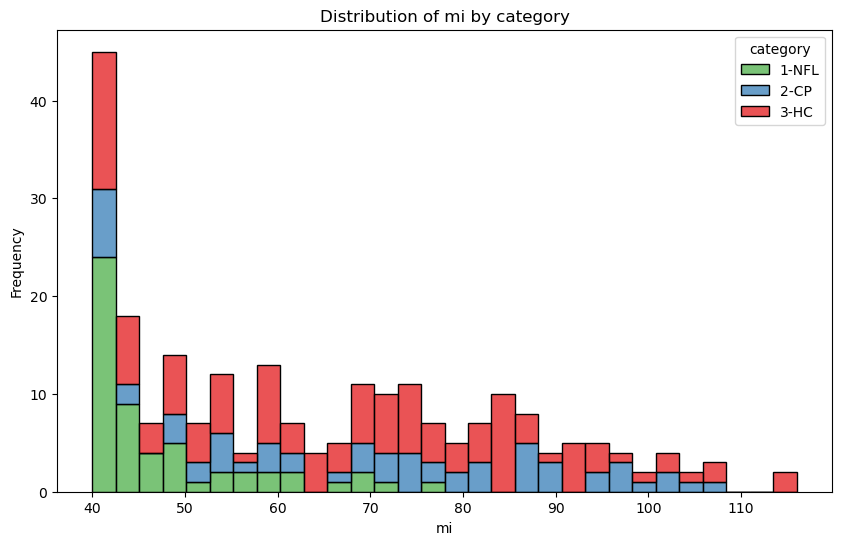

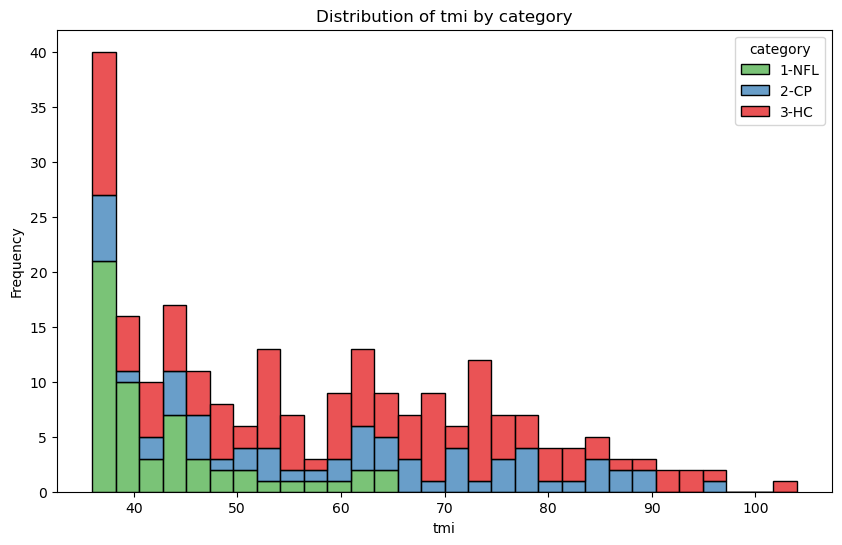

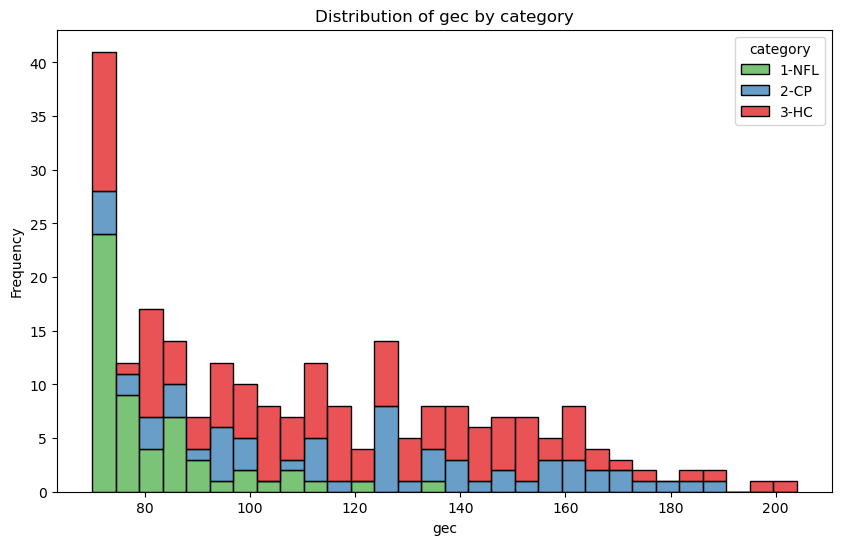

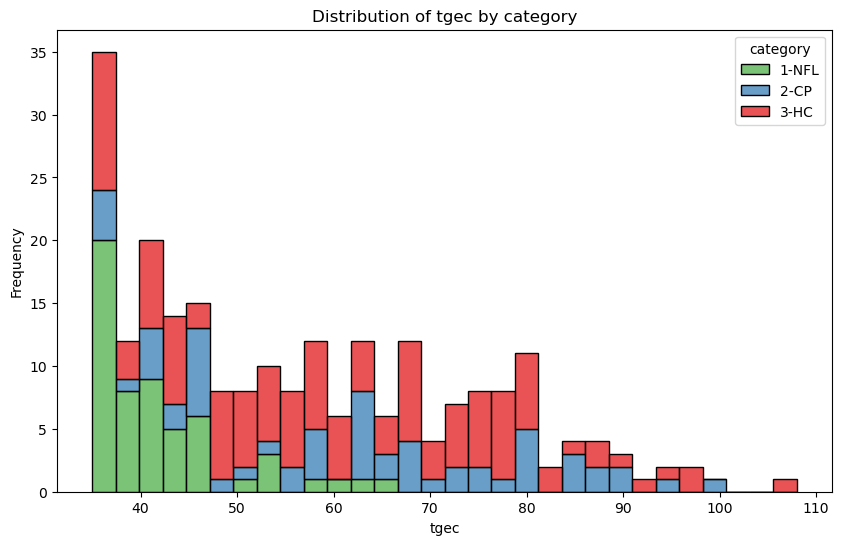

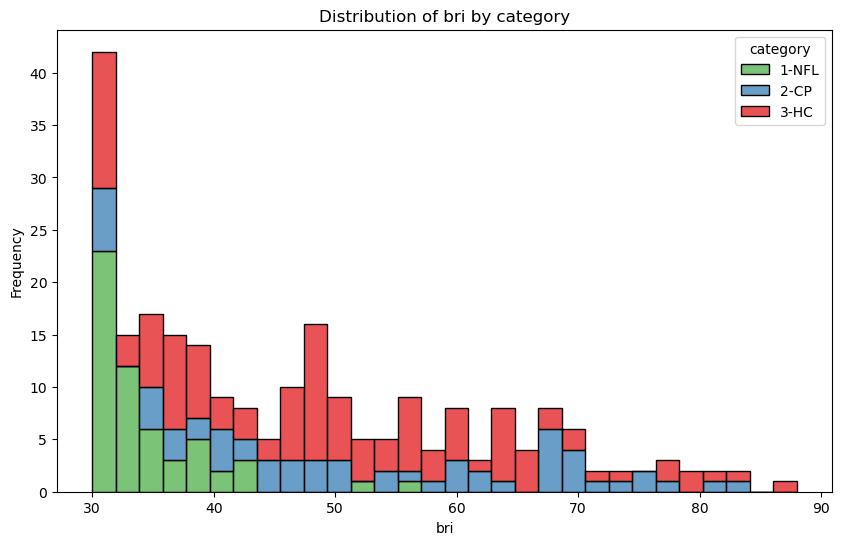

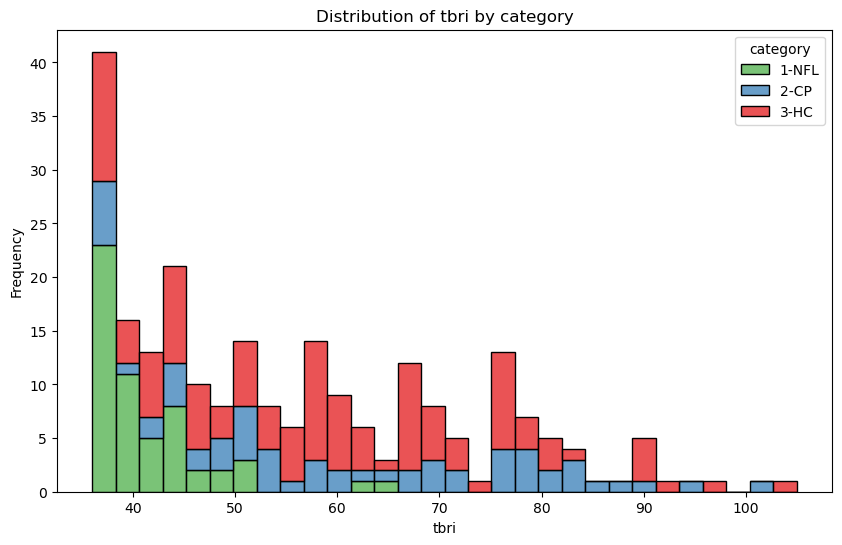

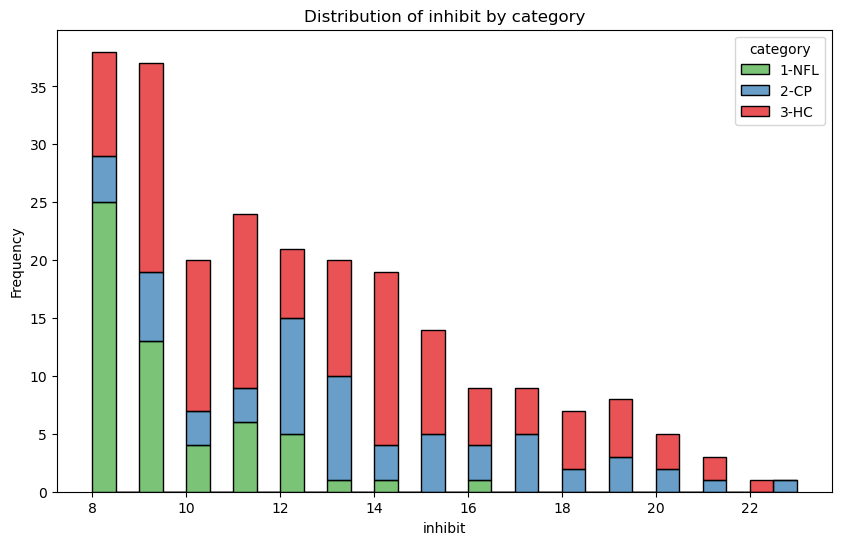

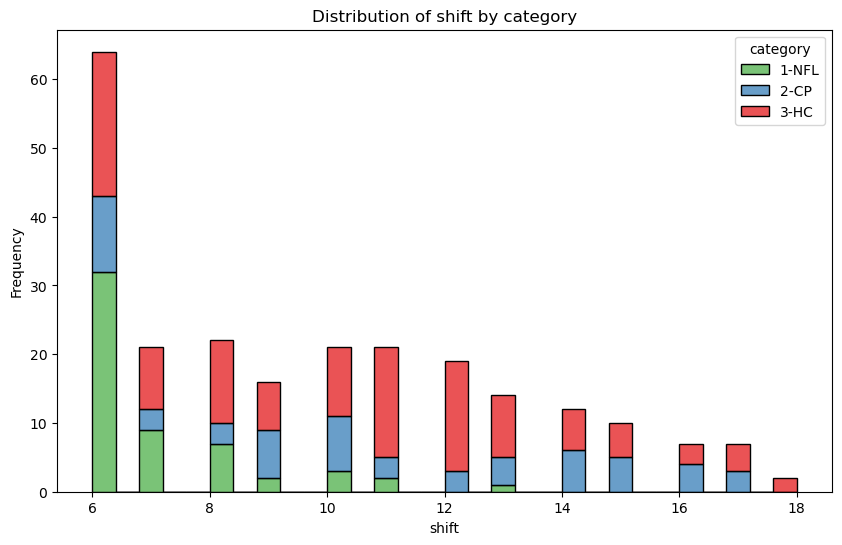

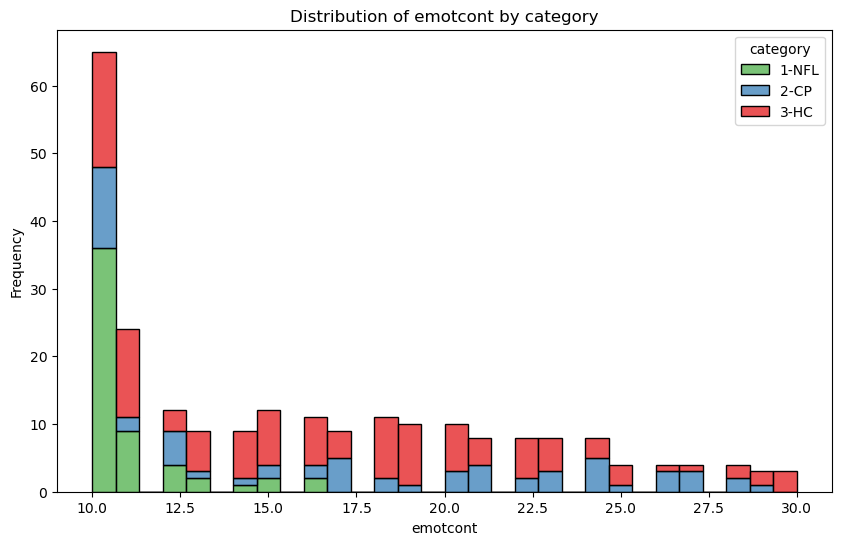

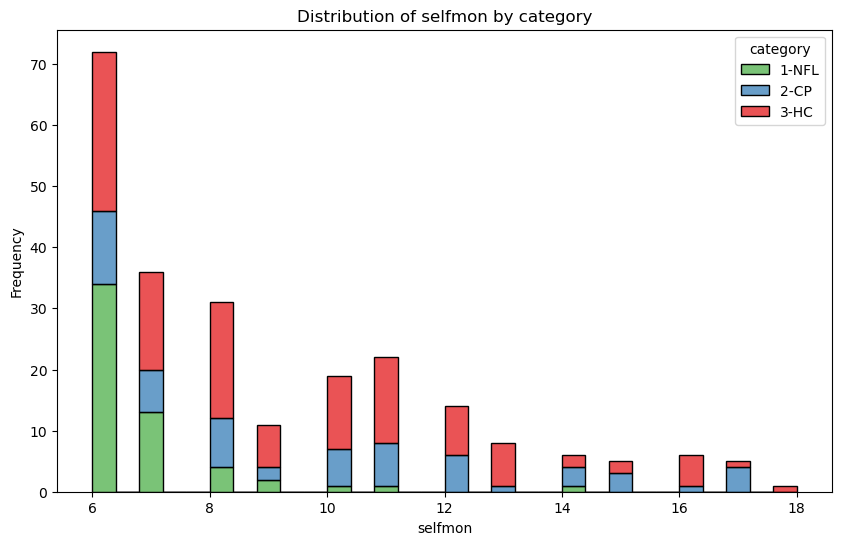

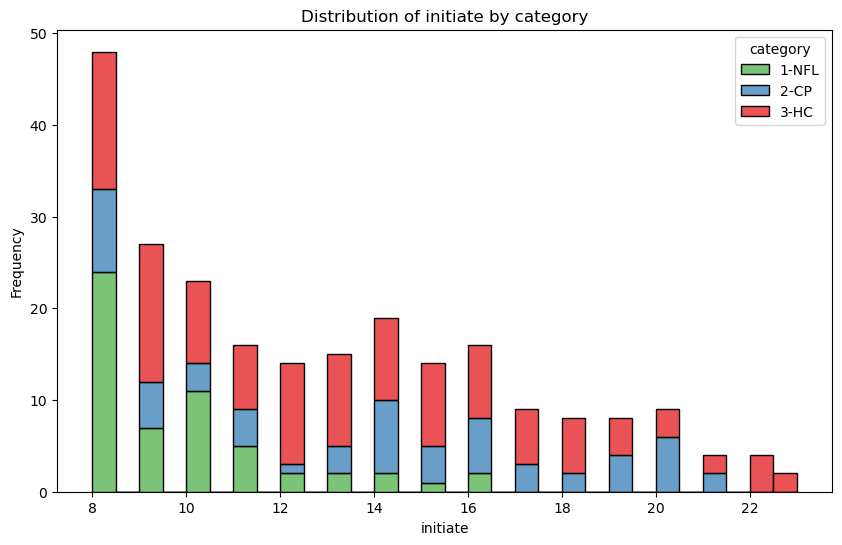

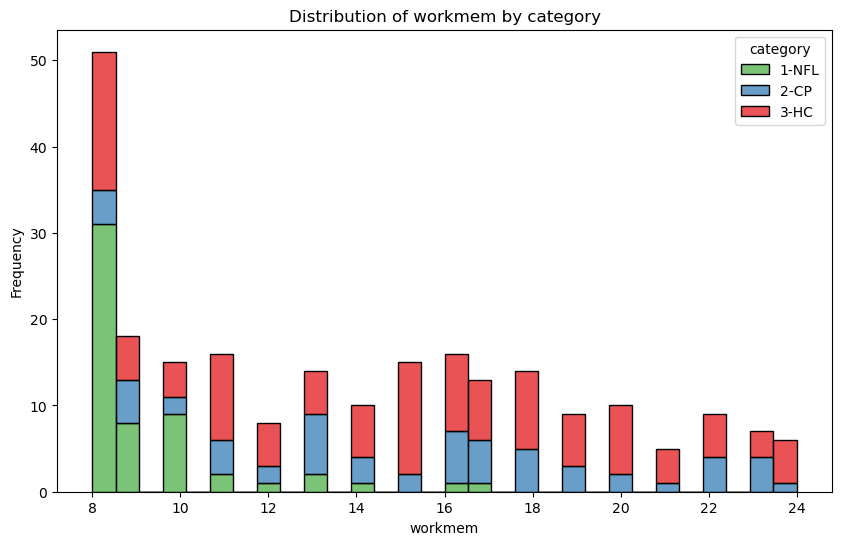

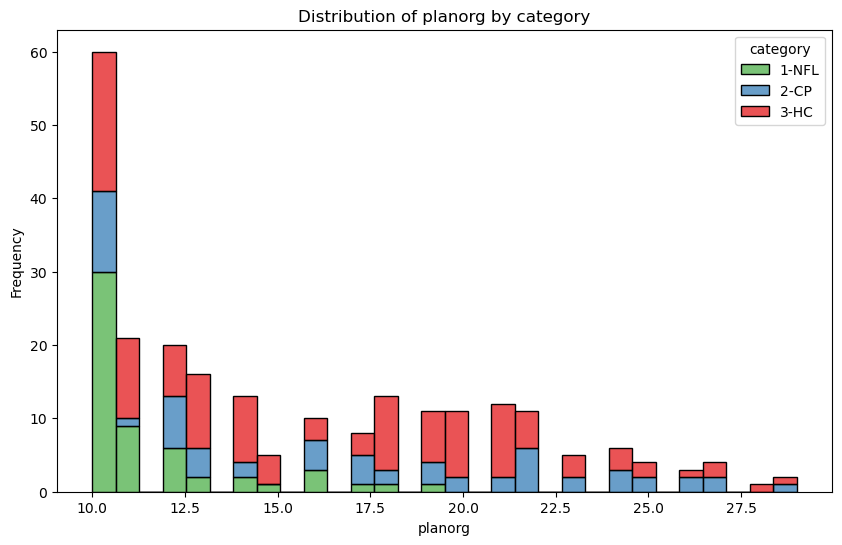

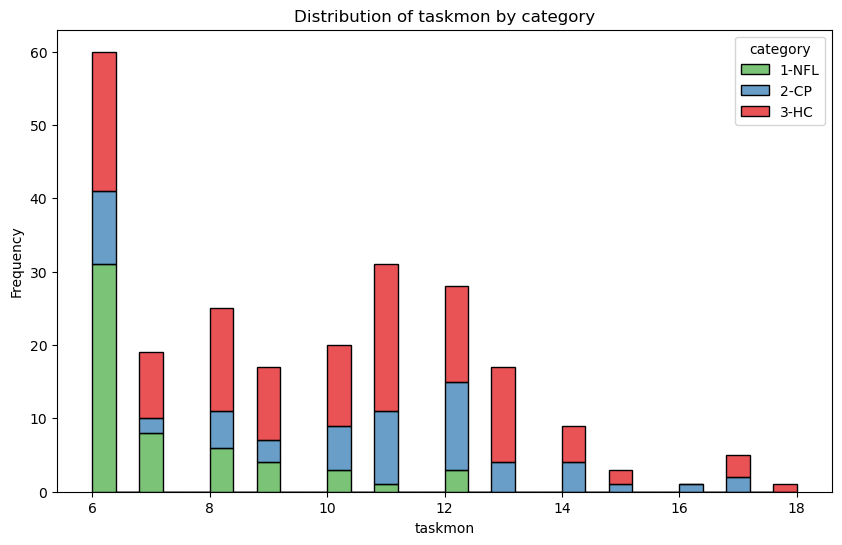

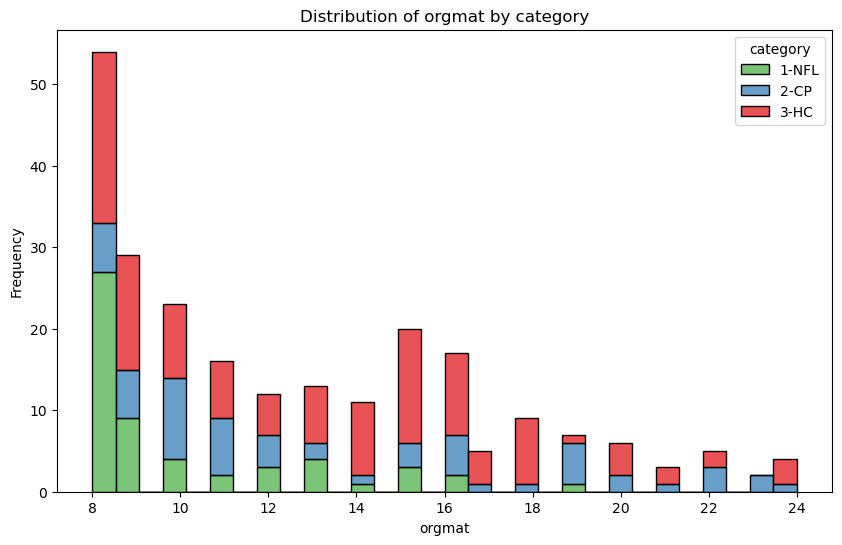

In [37]:
category_col = 'category'
column = selected_columns

# Define the full path for saving the figure
filename = f"{column}_distribution.png"
full_path = f"{save_path}/{filename}"
        

for column in selected_columns:
    if column != category_col:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=briefa, x=column, hue=category_col, palette='Set1', multiple='stack', bins=30)
        plt.legend(title=category_col, labels=['1-NFL', '2-CP', '3-HC'])
        plt.title(f'Distribution of {column} by {category_col}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.savefig(full_path)  
        plt.savefig(os.path.join(save_path, filename), bbox_inches='tight')  
        plt.show() 

    

# Trying Multiple Models

# Random Forest Regression

In [57]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
# from sklearn.model_selection import RandomizedSearchCV


results = []


model_name = "Random Forest Regression"

# Loop through each column in briefa and train a model
for column in selected_columns:
    y = briefa[column]  # Get the label column
    y_train, y_test = train_test_split(y, test_size=0.3, random_state=42)
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    models[column] = model

    y_pred = model.predict(X_test)
    predictions[column] = y_pred

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    
    
    
model_name = "Multiple Linear Regression"
for column in selected_columns:
    y = briefa[column]  # Define the target variable for the current column
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
          
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })

    
    
model_name = "Gradient Boosting Machines"

for column in selected_columns:
    y = briefa[column]  # Get the label column
    y_train, y_test = train_test_split(y, test_size=0.3, random_state=42)
    
    model = LGBMRegressor(random_state=42)  # Using LightGBM for regression
    model.fit(X_train, y_train)

    models[column] = model

    y_pred = model.predict(X_test)
    predictions[column] = y_pred

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
          
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    
    
    

model_name = "XGBoost"

# Loop through each column in briefa and train a model
for column in selected_columns:
    y = briefa[column]  # Get the label column
    y_train, y_test = train_test_split(y, test_size=0.3, random_state=42)
    
    model = xgb.XGBRegressor(random_state=42)  
    model.fit(X_train, y_train)

    models[column] = model

    y_pred = model.predict(X_test)
    predictions[column] = y_pred

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    
    
    
model_name = "SVR"
    
for column in selected_columns:
    y = briefa[column]  # Get the label column
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = SVR(kernel='rbf', C=0.2, epsilon=0.01)  # Default settings with RBF kernel

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    
    

model_name = "ANN"

scaler = StandardScaler()

for column in selected_columns:
    y = briefa[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scale the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # ANN model
    model = Sequential([
        Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=0)
    
    y_pred = model.predict(X_test_scaled).flatten()
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    
    
model_name = "KNN"

for column in selected_columns:
    y = briefa[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = KNeighborsRegressor(n_neighbors=5)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    


model_name = "Ensemble-Stacking"

# Define the base models
base_models = [
    ('knn', KNeighborsRegressor(n_neighbors=13, leaf_size=23, p=1, weights='uniform')),
    ('svr', SVR(kernel='rbf', C=0.2, epsilon=0.01))
]

# Define the final estimator
final_estimator = Ridge()

# Create the stacking model
stack_model = StackingRegressor(estimators=base_models, final_estimator=final_estimator, cv=5)

models = {}
predictions = {}

# Loop through each column in briefa and train a model
for column in selected_columns:
    y = briefa[column]  # Get the label column
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Fit the stacking model
    stack_model.fit(X_train, y_train)
    
    models[column] = stack_model

    # Predict using the stacking model
    y_pred = stack_model.predict(X_test)
    predictions[column] = y_pred
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    

model_name = "Ensemble-Bagging"

# Define the base model
base_model = SVR(kernel='rbf', C=0.2, epsilon=0.01)

# Initialize storage for models and predictions
models = {}
predictions = {}

# Loop through each column in briefa and train a model
for column in selected_columns:
    y = briefa[column]  # Get the label column
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Create the Bagging Regressor with SVR as the base model
    bagging_model = BaggingRegressor(base_estimator=base_model, n_estimators=10, random_state=42, n_jobs=-1)
    
    # Fit the Bagging model
    bagging_model.fit(X_train, y_train)
    
    models[column] = bagging_model

    # Predict using the Bagging model
    y_pred = bagging_model.predict(X_test)
    predictions[column] = y_pred
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    

model_name = "Lasso Regression"

# Loop through each column in briefa and train a Lasso model
for column in selected_columns:
    y = briefa[column]  # Get the label column
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Lasso Regression Model with L1 regularization
    model = Lasso(alpha=0.1)  # alpha is the regularization strength; smaller values mean less regularization
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    
    
model_name = "Ridge Regression"

for column in selected_columns:
    y = briefa[column]  # Get the label column
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Ridge Regression Model
    model = Ridge(alpha=1.0)  # alpha is the regularization strength; typical values might be 0.01, 0.1, 1, 10, etc.
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    
    
model_name = "Baesian Linear Regression"

for column in selected_columns:
    y = briefa[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = BayesianRidge()
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    
    
    
model_name = "Gaussian Processes"

kernel = RBF(1.0)

for column in selected_columns:
    y = briefa[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = GaussianProcessRegressor(kernel=kernel, random_state=42)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    
    
    
# Convert results to DataFrame and save to Excel
results_df = pd.DataFrame(results)
results_df.to_excel("briefa_from_bloodbiomk1.xlsx", index=False)
print("Results saved to briefa_from_bloodbiomk1.xlsx")   
    

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 165, number of used features: 9
[LightGBM] [Info] Start training from score 63.660606
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

3/3 [==============================] - 0s 1ms/step


C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and w

Results saved to briefa_from_bloodbiomk1.xlsx


C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cross_decomposition import CCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso, Ridge

# Initialize an empty list to store results from all models
results = []

def store_results(model_name, y_test, y_pred, column):
    mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
    mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
    r2 = r2_score(y_test, y_pred, multioutput='raw_values')
    for idx, col in enumerate(column):
        results.append({
            "Model": model_name,
            "Column": col,
            "Mean Squared Error": mse[idx],
            "Mean Absolute Error": mae[idx],
            "R^2 Score": r2[idx]
        })

X_train, X_test, y_train, y_test = train_test_split(X, briefa, test_size=0.3, random_state=42)


# Multivariate Linear Regression
model_name = "Multivariate Linear Regression"
linear_model = MultiOutputRegressor(LinearRegression())
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
store_results(model_name, y_test, y_pred, briefa.columns)


# Multi-Output Random Forest
model_name = "Multi-Output Random Forest"
forest_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)
store_results(model_name, y_test, y_pred, briefa.columns)


# Multi-Output Gradient Boosting
model_name = "Multi-Output Gradient Boosting"
gb_model = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
store_results(model_name, y_test, y_pred, briefa.columns)


# Canonical Correlation Analysis (CCA) for Feature Extraction + Multivariate Linear Regression
model_name = "Canonical Correlation Analysis (CCA)"
cca = CCA(n_components=min(X.shape[1], y_train.shape[1]))
X_train_cca = cca.fit_transform(X_train, y_train)
X_test_cca = cca.transform(X_test)
cca_model = MultiOutputRegressor(LinearRegression())
cca_model.fit(X_train_cca, y_train)
y_pred = cca_model.predict(X_test_cca)
store_results(model_name, y_test, y_pred, briefa.columns)


# Regularization Techniques for Multi-Label Regression
# L1 Regularization (Lasso)
model_name = "Lasso (L1 Regularization)"
lasso_model = MultiOutputRegressor(Lasso(alpha=0.1))
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
store_results(model_name, y_test, y_pred, briefa.columns)


# L2 Regularization (Ridge)
model_name = "Ridge (L2 Regularization)"
ridge_model = MultiOutputRegressor(Ridge(alpha=1.0))
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
store_results(model_name, y_test, y_pred, briefa.columns)


# Convert all results to a DataFrame and save to Excel
results_df = pd.DataFrame(results)
results_df.to_excel("multi_label_briefa_from_bloodbiomk1.xlsx", index=False)
print("Results saved to multi_label_briefa_from_bloodbiomk1.xlsx")


# XGBoost-Hyperparameter Optimization

In [ ]:
# ## RandomizedSearchCV

# from sklearn.model_selection import RandomizedSearchCV
# import xgboost as xgb

# # Define the model
# model = xgb.XGBRegressor()

# # Define the parameter distribution
# param_dist = {
#     'max_depth': [3, 4, 5, 6, 7],
#     'n_estimators': [100, 200, 300, 400, 500],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.6, 0.7, 0.8, 0.9],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
# }

# # Setup the random search with cross-validation
# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=25, scoring='neg_mean_squared_error', cv=3, verbose=1, random_state=42)

# # Fit random search
# best_model = random_search.fit(X_train, y_train)

# # Best parameters and best score
# print("Best parameters:", random_search.best_params_)
# print("Best score:", random_search.best_score_)


In [ ]:
# # rerun the model based on values I got from RandomizedSearchCV

# model_name = "XGBoost-Randomized"

# results = []

# for column in selected_columns:
#     y = briefa[column]  # Get the label column
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#     model = xgb.XGBRegressor(
#         colsample_bytree=0.7, 
#         learning_rate=0.01, 
#         max_depth=7, 
#         n_estimators=100, 
#         subsample=0.6,
#         random_state=42
#     )

#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)

#     mse = mean_squared_error(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
    
#     # Append results to the list
#     results.append({
#         "Model": model_name,
#         "Column": column,
#         "Mean Squared Error": mse,
#         "Mean Absolute Error": mae,
#         "R^2 Score": r2
#     })
    

# results_df = pd.DataFrame(results)
# results_df.to_excel("briefa_from_bloodbiomk1.xlsx", index=False)
# print("Results saved to briefa_from_bloodbiomk1.xlsx")


In [ ]:
# ## GridSearchCV

# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb

# # Define the model
# model = xgb.XGBRegressor()

# # Define the parameter grid
# param_grid = {
#     'max_depth': [3, 4, 5],
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9],
# }

# # Setup the grid search
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)

# # Fit grid search
# best_model = grid_search.fit(X_train, y_train)

# # Best parameters and best score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

In [ ]:
# # rerun the model based on values I got from GridSearchCV

# model_name = "XGBoost-GridSearch"

# results = []


# for column in selected_columns:
#     y = briefa[column]  # Get the label column
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#     # Initialize XGBoost with the best parameters from Grid Search
#     model = xgb.XGBRegressor(
#         colsample_bytree=0.8, 
#         learning_rate=0.01, 
#         max_depth=3, 
#         n_estimators=50, 
#         subsample=0.7,
#         random_state=42
#     )

#     # Fit the model
#     model.fit(X_train, y_train)

#     # Predict on the test set
#     y_pred = model.predict(X_test)

#     # Calculate metrics
#     mse = mean_squared_error(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     # Append results to the list
#     results.append({
#         "Model": model_name,
#         "Column": column,
#         "Mean Squared Error": mse,
#         "Mean Absolute Error": mae,
#         "R^2 Score": r2
#     })

# results_df = pd.DataFrame(results)
# results_df.to_excel("briefa_from_bloodbiomk1.xlsx", index=False)
# print("Results saved to briefa_from_bloodbiomk1.xlsx")

